In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading dataset and data informations

In [2]:
# loading the dataset
df = pd.read_csv(r"C:\Users\Surjit Singh Kadian\Desktop\avacado.csv")

In [3]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1           1  20-12-2015          1.35      54876.98   674.28   44638.81   
2           2  13-12-2015          0.93     118220.22   794.70  109149.67   
3           3  06-12-2015          1.08      78992.15  1132.00   71976.41   
4           4  29-11-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
# no. of rows and coloumns
df.shape

(18249, 14)

There are 18249 rowas and 14 columns present in dataset

In [5]:
# dopping the unnecessary column
df = df.drop("Unnamed: 0",axis=1)

We have dropped a column Unnamed

In [6]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [7]:
df = df.rename(columns={'4046':'PLU4046','4225':'PLU4225','4770':'PLU4770'})

In [8]:
df.head()

Date  AveragePrice  Total Volume  PLU4046    PLU4225  PLU4770  \
0  27-12-2015          1.33      64236.62  1036.74   54454.85    48.16   
1  20-12-2015          1.35      54876.98   674.28   44638.81    58.33   
2  13-12-2015          0.93     118220.22   794.70  109149.67   130.50   
3  06-12-2015          1.08      78992.15  1132.00   71976.41    72.58   
4  29-11-2015          1.28      51039.60   941.48   43838.39    75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [9]:
# Checking the types of the dataset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
PLU4046         float64
PLU4225         float64
PLU4770         float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

There are total 13 columns in dataset out of that Date,type and region are object type and year in int data type, rest other columns are in float dataset

The Date column showing object data type which means python is not able to understand the type of Date. So let's do feature engineering to split Date into Month and Day. Since year column is already been there so no need to separate it.

# Feature Engineering

In [10]:
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])

In [11]:
# Checking the type of data again
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
PLU4046                float64
PLU4225                float64
PLU4770                float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

We can see the Date column has datetime data type. Now let's split this data into months and day.

In [12]:
df["Month"] = df["Date"].dt.month

In [13]:
df["Day"] = df["Date"].dt.day

Now we have separated Month and Day from Date column and now the column Date is of no use, so let's drop it.

In [14]:
df.drop("Date",axis=1,inplace=True)

In [15]:
df.head()

AveragePrice  Total Volume  PLU4046    PLU4225  PLU4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85    48.16     8696.87   
1          1.35      54876.98   674.28   44638.81    58.33     9505.56   
2          0.93     118220.22   794.70  109149.67   130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41    72.58     5811.16   
4          1.28      51039.60   941.48   43838.39    75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany      6   12  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [16]:
# Checking again the shape of the dataset
df.shape

(18249, 14)

There are 18249 rows and 14 columns. Here we have added two more columns from date.

In [17]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   PLU4046       18249 non-null  float64
 3   PLU4225       18249 non-null  float64
 4   PLU4770       18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


This gives the brief information about the dataset which includes indexing type, column type, no-null values and memory usage.

In [18]:
# Checking number of unique values in each column
df.nunique()

AveragePrice      259
Total Volume    18237
PLU4046         17702
PLU4225         18103
PLU4770         12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

These are the number of unique values present in each columns.

In [19]:
# Checking null values in the dataset
df.isnull().sum()

AveragePrice    0
Total Volume    0
PLU4046         0
PLU4225         0
PLU4770         0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

There are no null values present in dataset

<AxesSubplot:>

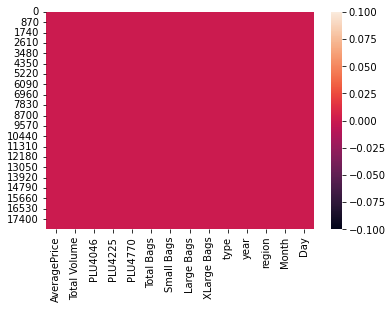

In [20]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

By visualizing also we can see there are no missing values. So our data is cleaned.

In [21]:
# Checking the uniqueness of target variable
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

Above are the unique values present in the target variable.

In [22]:
# List of values in the target variable
df["AveragePrice"].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

The values in the target variable which has int64 data type.

# Description of Dataset

In [23]:
# Statistical summary of dataset
df.describe()

AveragePrice  Total Volume       PLU4046       PLU4225       PLU4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

              Month           Day  
count  18249.000000  18249.000000  
mean       6.372842     15.466984  
std        3.525034      8.984552  
min        1.000000      1.000000  
25%        3.000000      7.000000  
50%        6.000000     16.000000  
75%       10.000000     23.000000  
max       12.000000     31.000000

Observations:

This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

The counts of all the columns are same which means there are no null values present in the daaset.

The label Average Price has mean which is bit greater than median, means it is skewed to right. The minimum price of the single fruit avocado is 0.44 dollars(say), max is 3.25 and mean is 1.04.

The mean and the median(50%) are very close to each other in most of the columns like 4225(Total number of avocados with PLU 4225), year, Month, Day which means the data is symmetrical (normal) in these columns.

The mean is greater than the median in most of the columns which means they are skewed to right.

In some of the columns median is greater than the mean, hence they are skewed to left.

Most of the columns have nearly zero statistics also the mean and the standard deviation are very close to each other.

By looking at the difference between max and 75% (3rd quantile), we can infer there are outliers present in most of the column. We will remove this outliers in further steps.

Before visualizing the data let's separate the categorical and numerical columns.

In [24]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


These are the categorical columns that we have, will encode these columns using either label encoder or one hot encoder.

In [25]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', 'PLU4046', 'PLU4225', 'PLU4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


Above are the numerical columns present in the dataset.

# Data Visualization

# Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


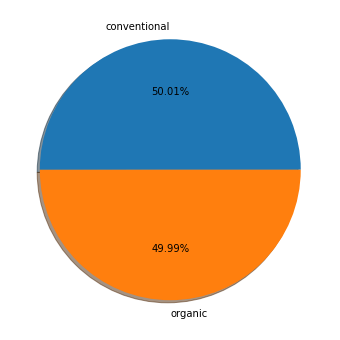

In [26]:
#Visualize the count of type of the avocado
print(df["type"].value_counts())
labels='conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

We can observe both conventional and organic types of avocado are equal in counts. Which means half of the avocado products involves chemicals. Both types have equal demand.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


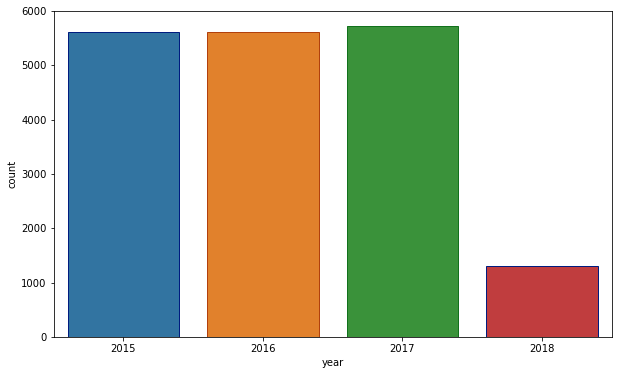

In [27]:
#Visualize the count of year
print(df["year"].value_counts())
plt.figure(figsize=(10,6))

sns.countplot(df["year"],edgecolor=sns.color_palette("dark", 3))
plt.show()

The count of 2017 is bit higher than 2016 and 2015, 2018 has very less count, whch means the price and the sales of avocado is less in this year

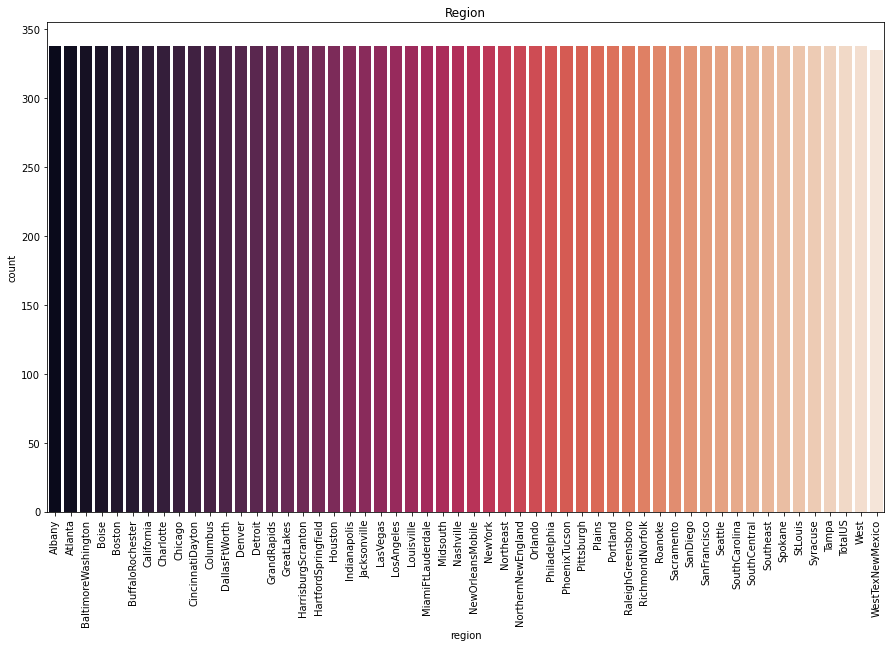

In [28]:
#Visualize the count of year
plt.figure(figsize=(15,9))
sns.countplot(df["region"],palette="rocket")
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

We can observe the count of avocado is almost same in all the regions, all of them have the count 338 but WestTexNewMexico has count 335 which is bit less than others.

Let's plot the distribution plot to know how the data has been distributed in all the columns.

# Distribution of skewness

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


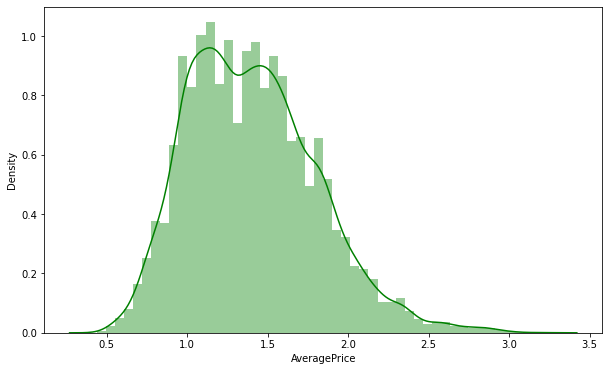

In [29]:
# Distribution plot for target variable "AveragePrice"
print(df["AveragePrice"].value_counts())
plt.figure(figsize=(10,6))
sns.distplot(df["AveragePrice"], color="g")
plt.show()

We can infer that the data is normally distributed in the label. Also the price of the avocado is more between 1.15 - 1.5.

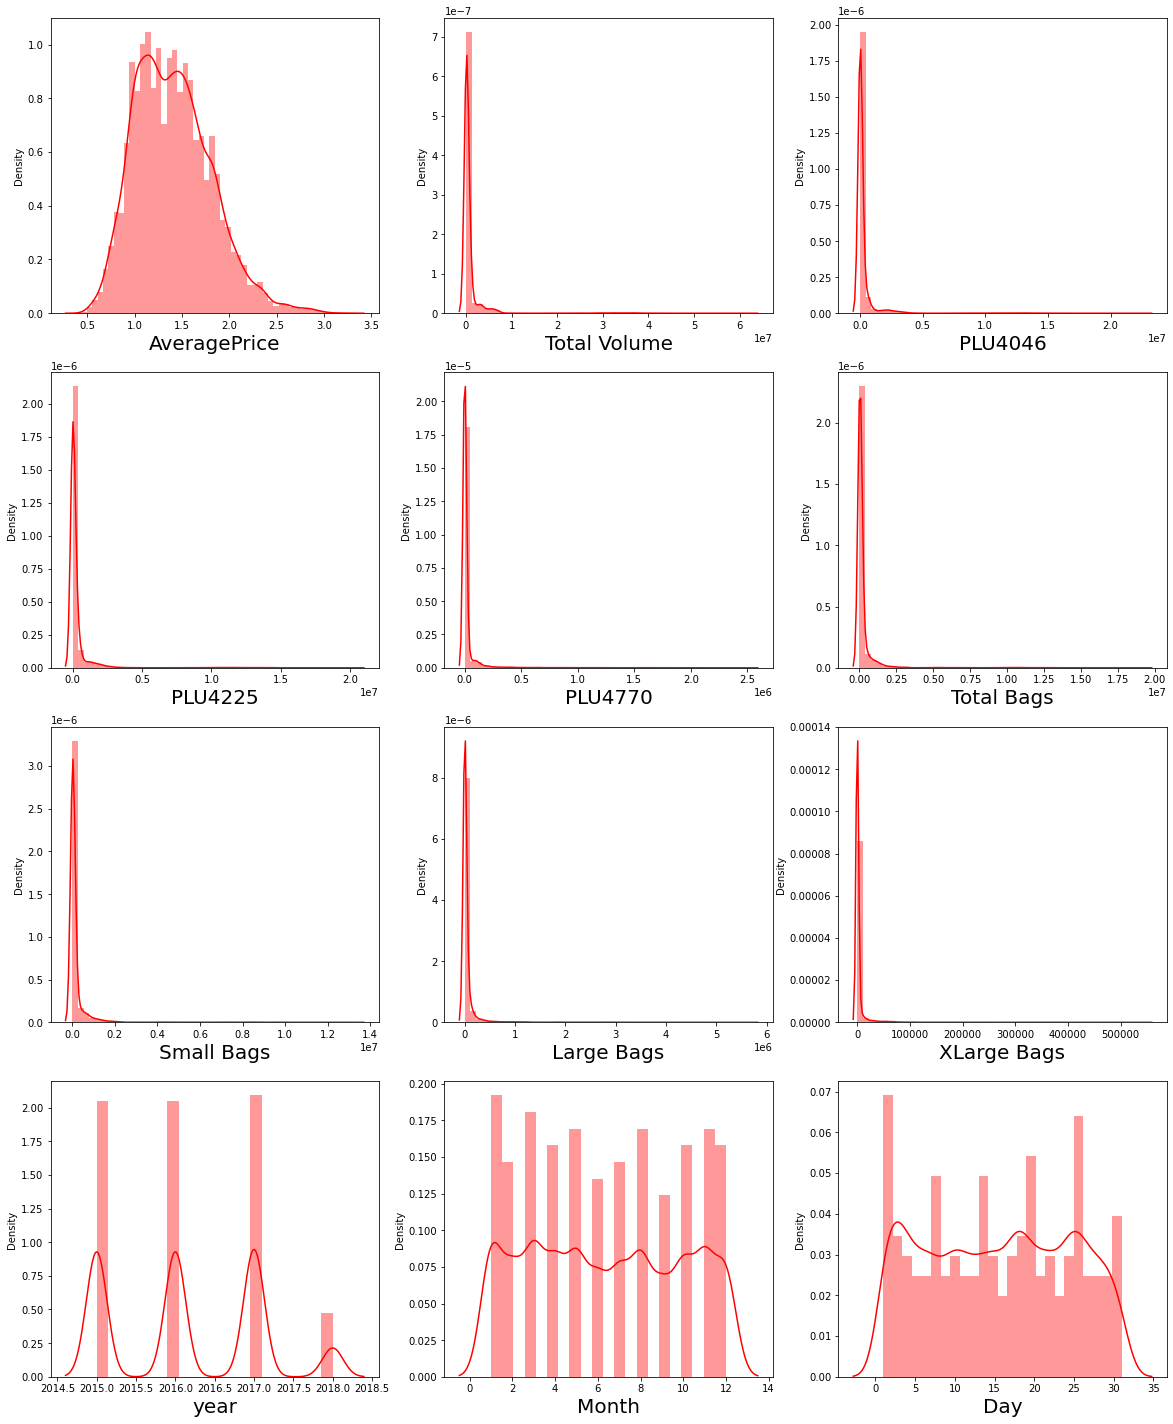

In [30]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From the above distplots we can observe that none of the columns are normally distributed but AveragePrice.

Also the columns contains huge skewness most of them are skewed to left, which means median is more than the mean in these columns.

# Bivariate Analysis

# Comparision between year and AveragePrice

Text(0, 0.5, 'AveragePrice')

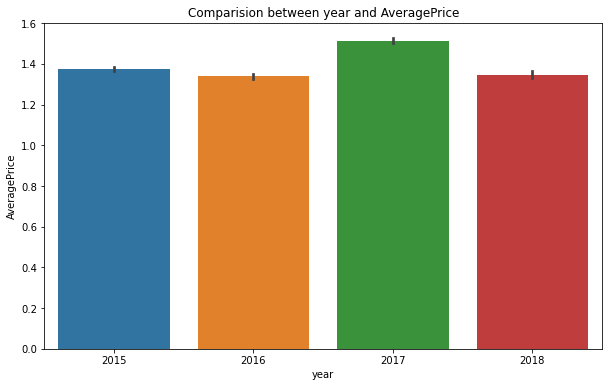

In [31]:
# Checking which year has maximum AveragePrice
plt.figure(figsize=[10,6])
plt.title('Comparision between year and AveragePrice')
sns.barplot(df['year'],df['AveragePrice'], data=df);
plt.xlabel("year")
plt.ylabel("AveragePrice")

The barplot shows that the AveragePrice is maximum in the year 2017 followed by 2015.

# Relationship between Average Price and Month

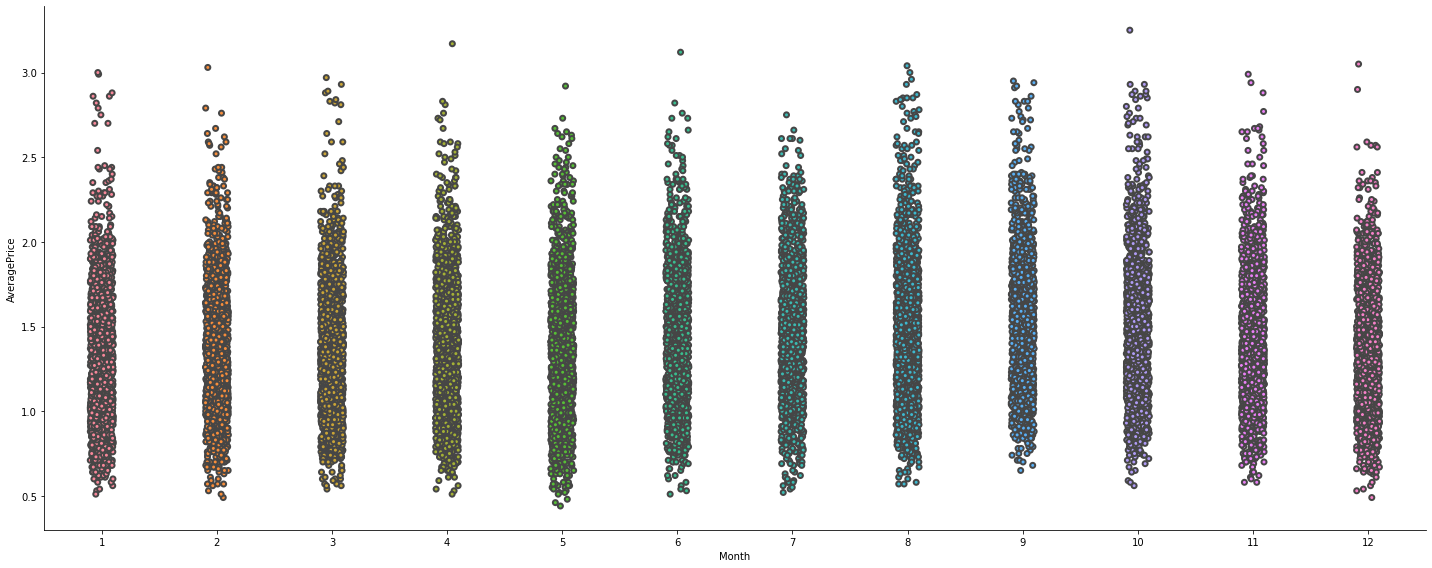

In [32]:
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=df,height=8, linewidth=2, aspect=2.5)

Looking at the plot we can observe the Average Price remains high during August(8th month), September(9th month) and October and starts to drop from November onwards. Also the price of avocado is less in the months may to july and again there is an increment of price of avocado in the month April and March.

# Relationship between year and Total volume

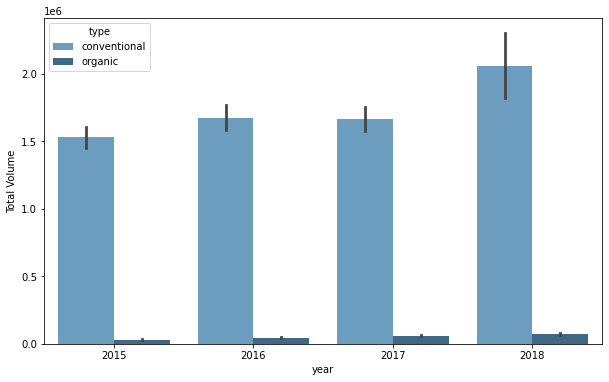

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='Total Volume',hue="type",data=df,palette="Blues_d",ci=68)
plt.show()

Conventional types were sold higher every year with low price than Organic types which means the demand for conventional is high. Also The Total sales volume is spotted highest in the year 2018 and then declined in 2015. The total sales are same in the year 2016 and 2017.

# Relationship between Month and Average Price

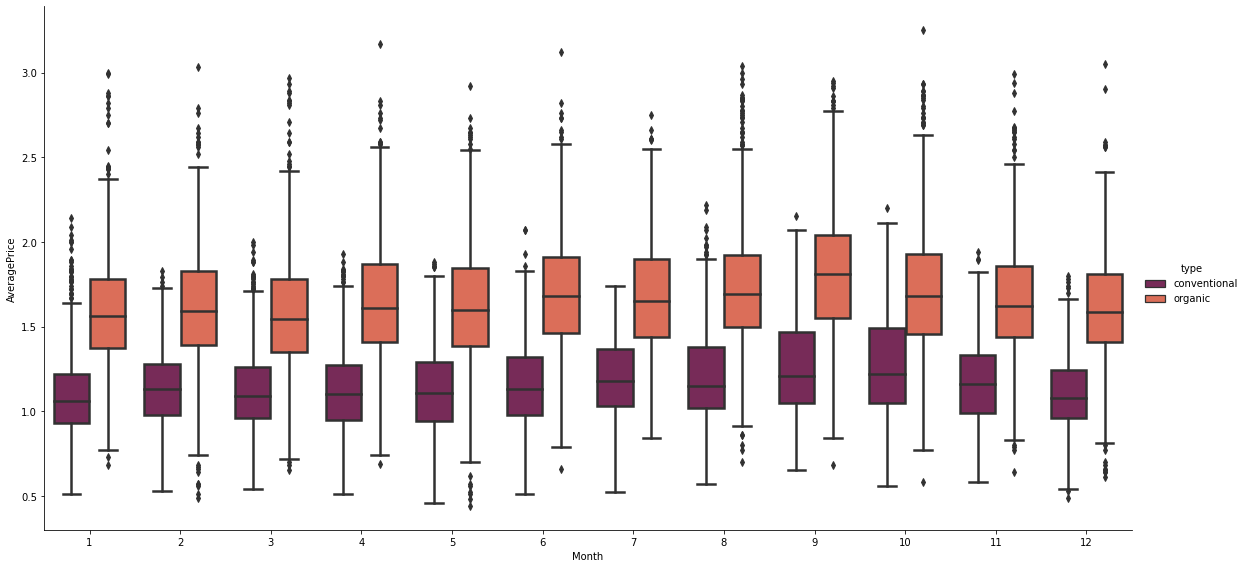

In [34]:
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=8, linewidth=2.5, aspect=2,palette="rocket");

The AveragePrice of organic avocado fruit is more than the conventional type. As we can observe the AveragePrice of both type of avocados is high in the months August, September and October and it pulled down in November. Also the price is high in April and March.

# Relationship between Total volume and Avarage Price

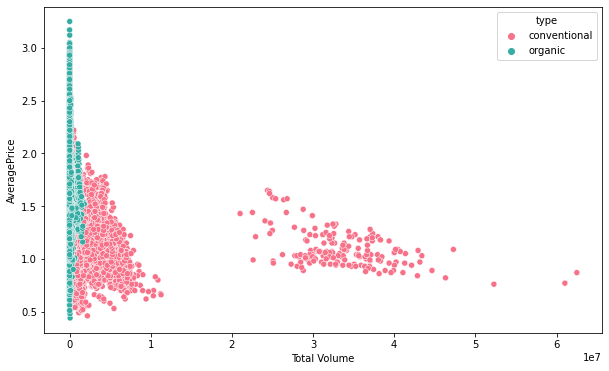

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=df,palette="husl")
plt.show()

The scatter plot gives the relationship between the total volume and average price on the basis of type. All organic type of avocado is lies in the volume zero and the average price is high for organic. The conventional type avocado has total volume 0-4 with the Average price upto 2.3. So the Average Price of the oraganic type with zero volume is more than the conventional type.

# Comparision between PLU sold vs Day

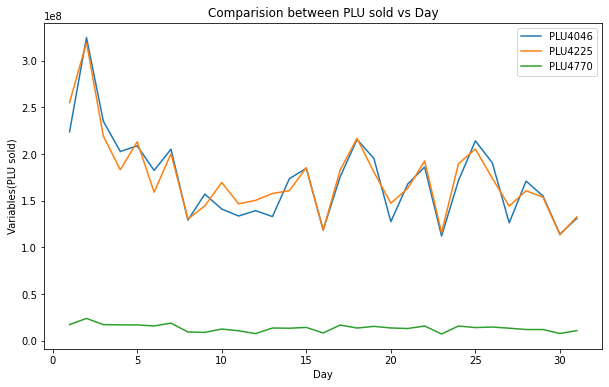

In [36]:
variables = df[['PLU4046', 'PLU4225', 'PLU4770']].groupby(df.Day).sum()
variables.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

From the line plot we can observe how the total number of avocados with PLU4046, PLU4225 and PLU4770 are sold in each day starting from day 1 to day 31. We can notice very few avocados with PLU4046 was sold in all the day and the avocados with PLU4225 and PLU4770 was sold all time high.

# Comparision between type of bags sold vs year

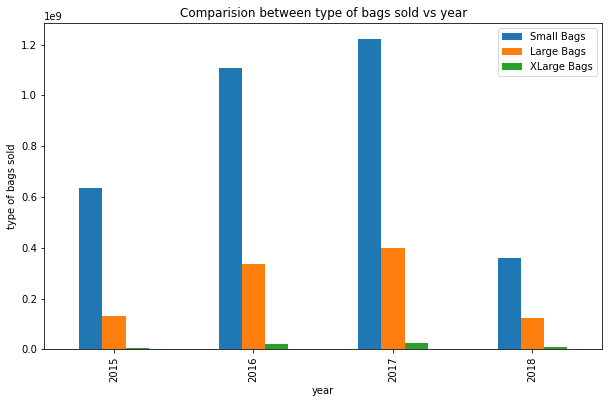

In [37]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.year).sum()
feature.plot(kind='bar', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("year")
plt.ylabel("type of bags sold")
plt.show()

Small bag size was sold all time highest where Xlarge Bag size was least sold.

# Average Price in each region with year

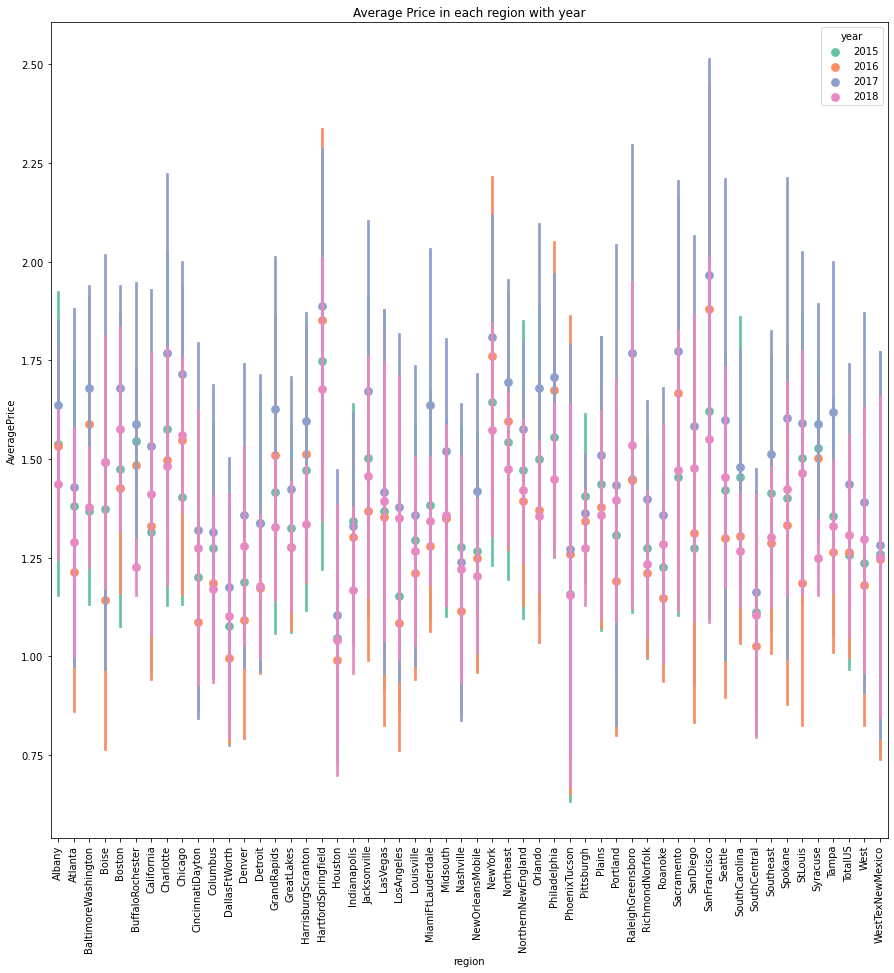

In [38]:
plt.figure(figsize=(15,15))
plt.title("Average Price in each region with year")
sns.pointplot(x='region',y='AveragePrice',data=df, hue='year',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

The average price of the avocado is high in the region SanFrancisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high in the year 2017 and less in the year 2018.

# Comparision between Day and AveragePrice

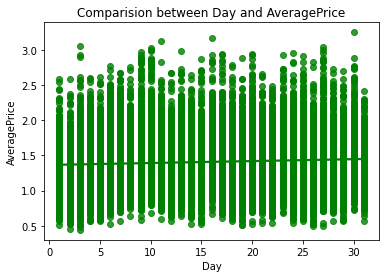

In [39]:
# plt.figure(figsize=[10,6])
plt.title('Comparision between Day and AveragePrice')
sns.regplot(df['Day'],df['AveragePrice'],color="g");
plt.show()

The average price of the avocado is high in almost all the days and less in 7th, 14th and 22nd day of the month.

# Comparision between type of bags sold vs year

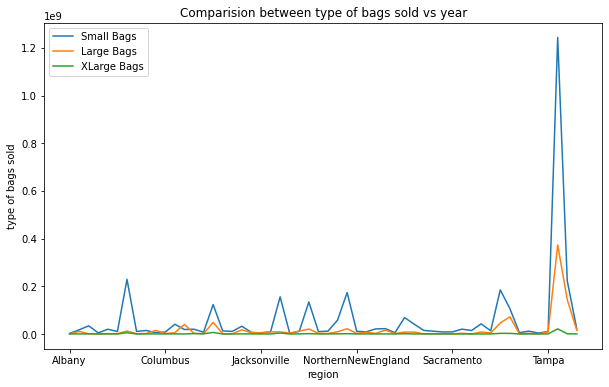

In [40]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.region).sum()
feature.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("region")
plt.ylabel("type of bags sold")
plt.show()

Small bags size sold high in the region Tampa. The price of Small bag size is also high in this region followed by Large Bags Size and Xlarge Bags size was sold least.

# Comparision between Total Bags and Total Volume

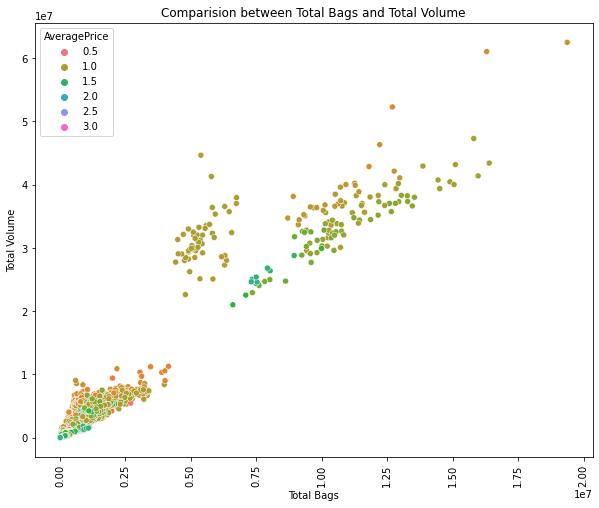

In [41]:
plt.figure(figsize=(10,8))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="AveragePrice",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

There is a linear relationship between the features. As the total bags sales increases with total volume, the average price of the avocado also increases.

# Comparision between Small Bags sold vs AveragePrice

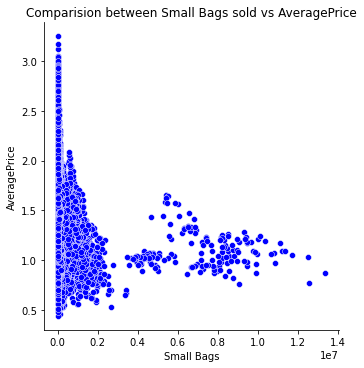

In [42]:
sns.relplot(df['Small Bags'],df['AveragePrice'],color="b");
plt.title("Comparision between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

The Small Bags size has high average price at first and also from the range 0-0.6, the price of small bag type is almost 1.6.

# Comparision between the PLU 4046 and PLU 4225

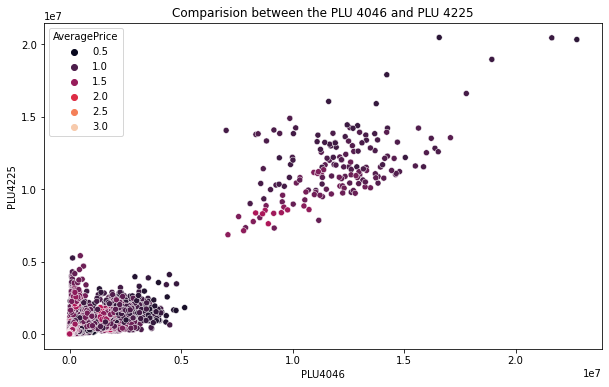

In [43]:
plt.figure(figsize=(10,6))
plt.title("Comparision between the PLU 4046 and PLU 4225")
sns.scatterplot(df["PLU4046"],df["PLU4225"],hue=df["AveragePrice"],palette="rocket")
plt.show()

There is a linear relationship between the total number of avocados with PLU 4046 and PLU 4225 sold. The number of avocados with PLU 4046 and PLU 4225 sold increases, the average price also increases as shown in the graph. These scatter plots can also be observed in the pairplot.

# Multivariate Analysis

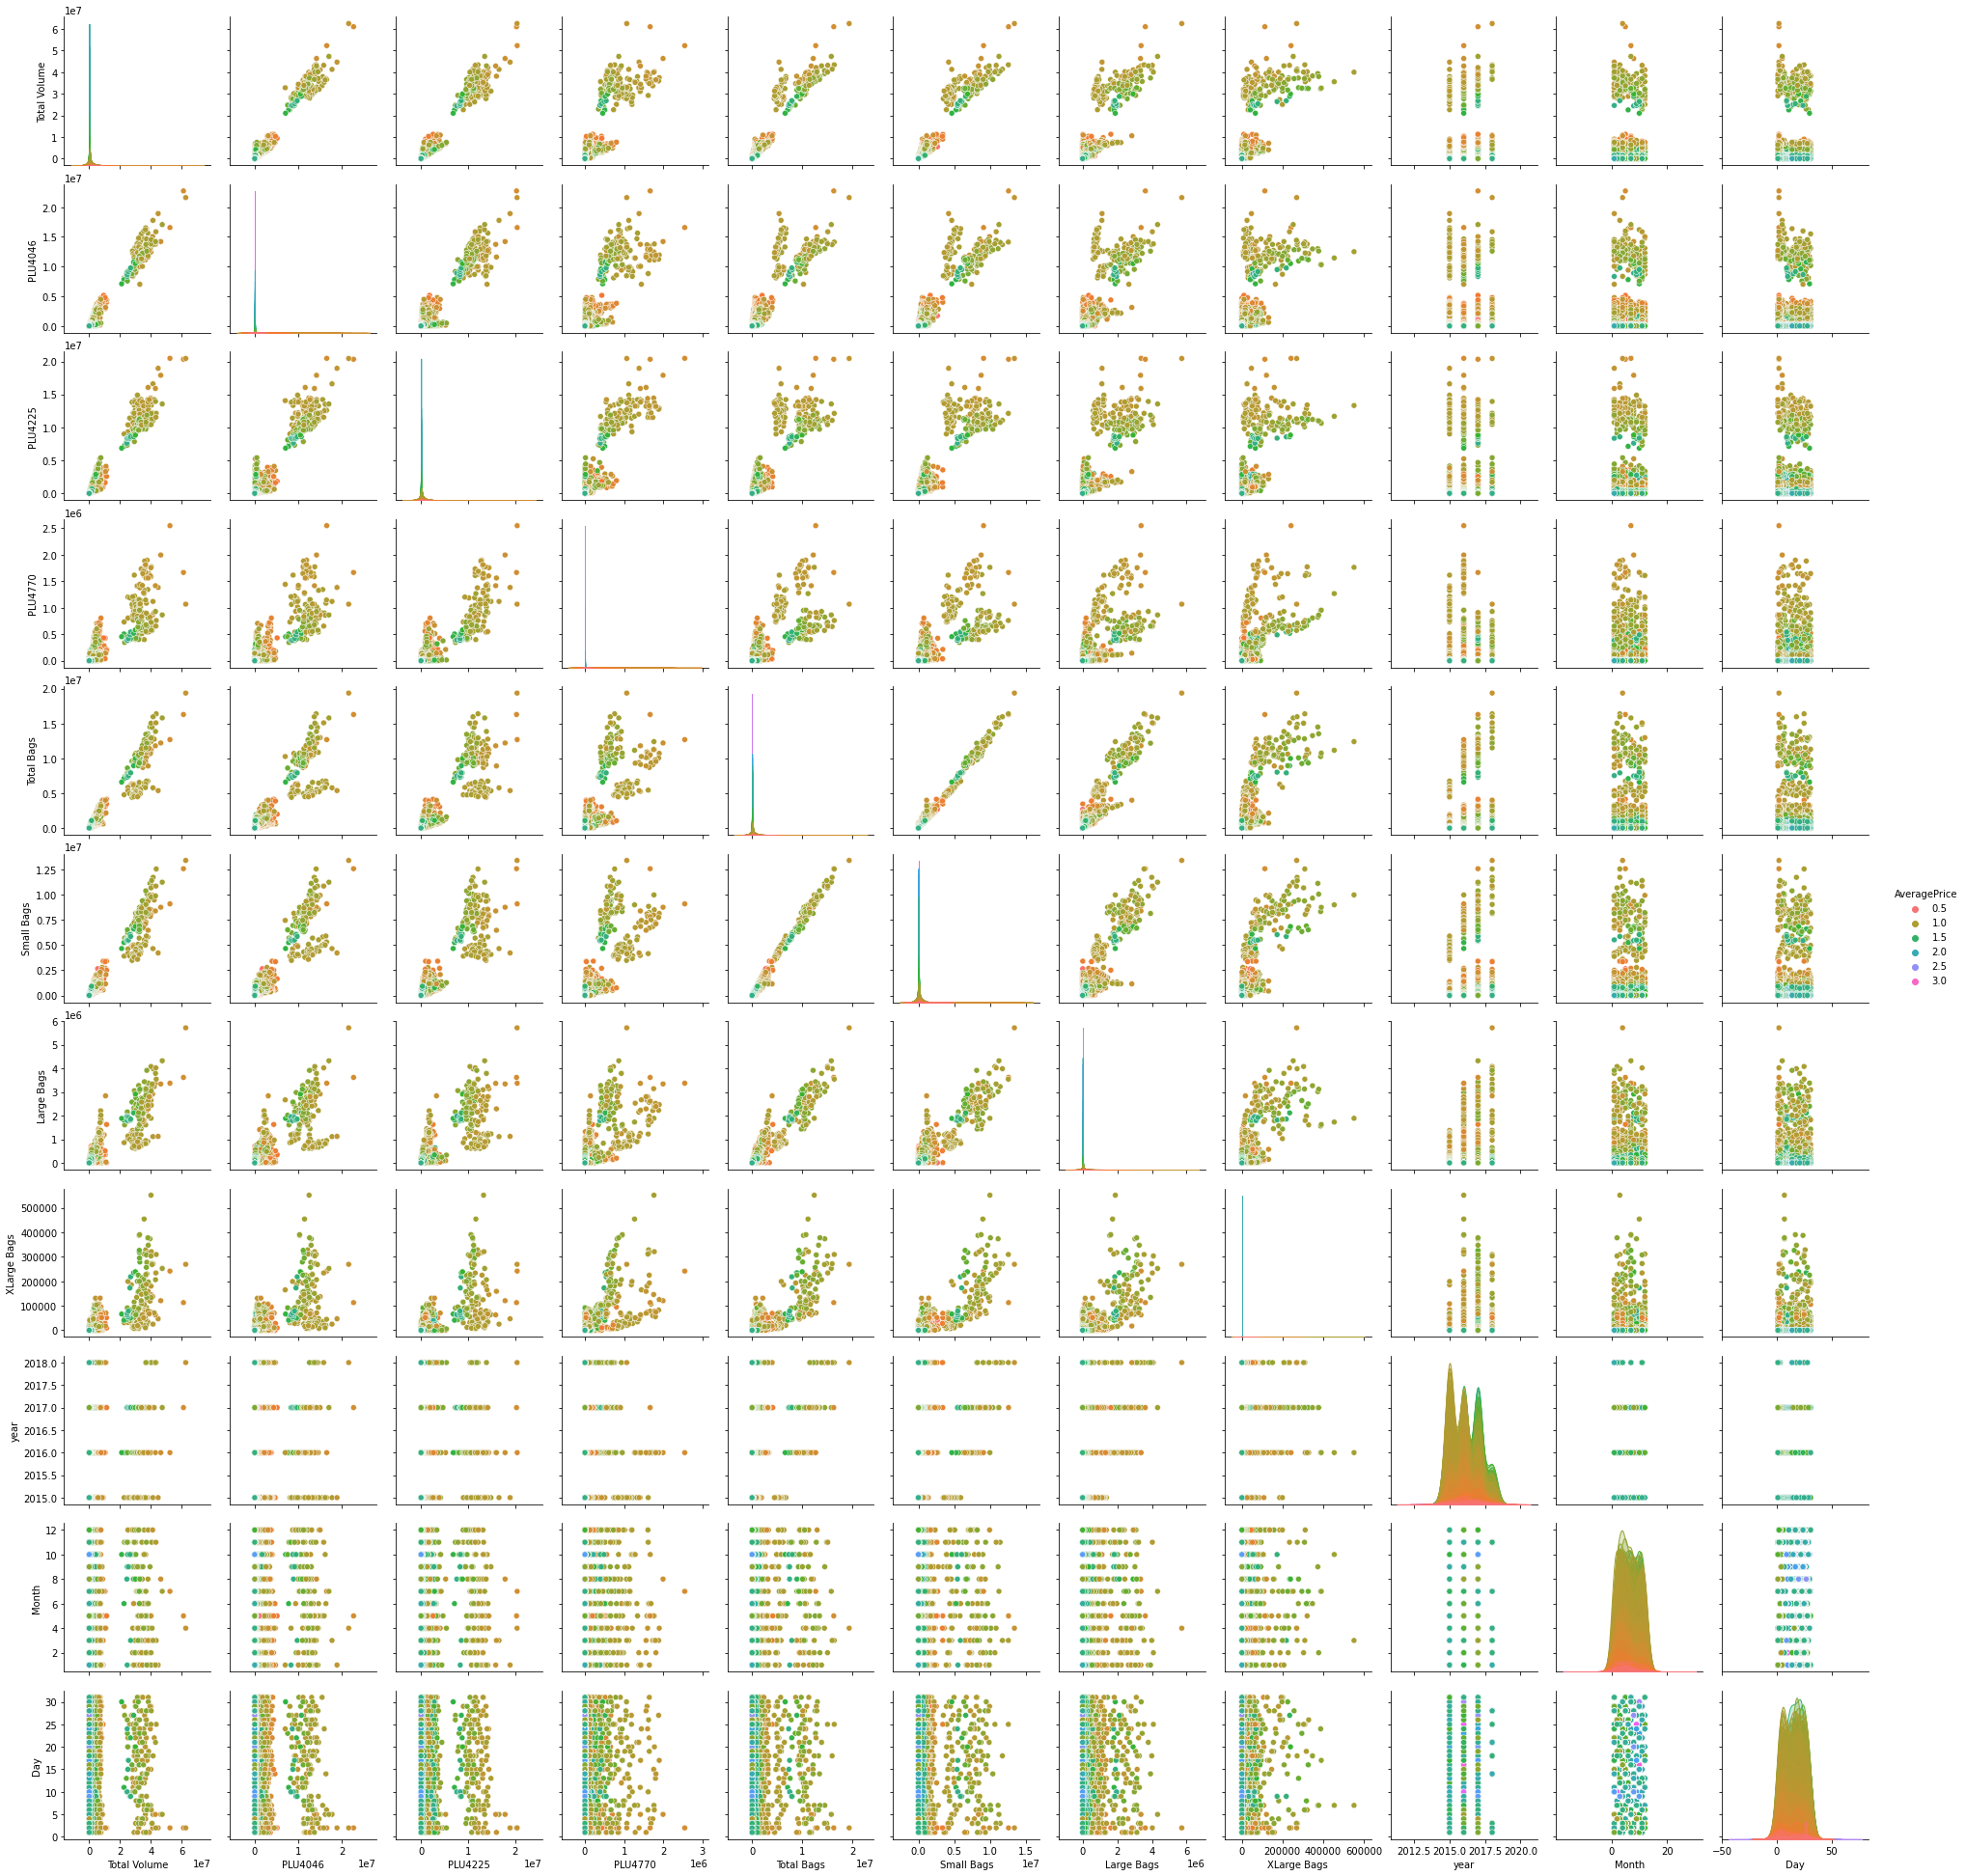

In [44]:
sns.pairplot(df,hue="AveragePrice",palette="husl")

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "AveragePrice". Here we can observe the relation between the features and label.

From this pairplot we can observe that the existence of correlation between two variables and on the diagonal we can see distribution plotting.

Here we can infer that linear relationship exists in most of the columns and others have no much relationship with each other.

We can also notice the correlation between the features and some columns have outliers which we will remove using appropriate methods. Day column is highly correlated with all the other features.

# Outliers

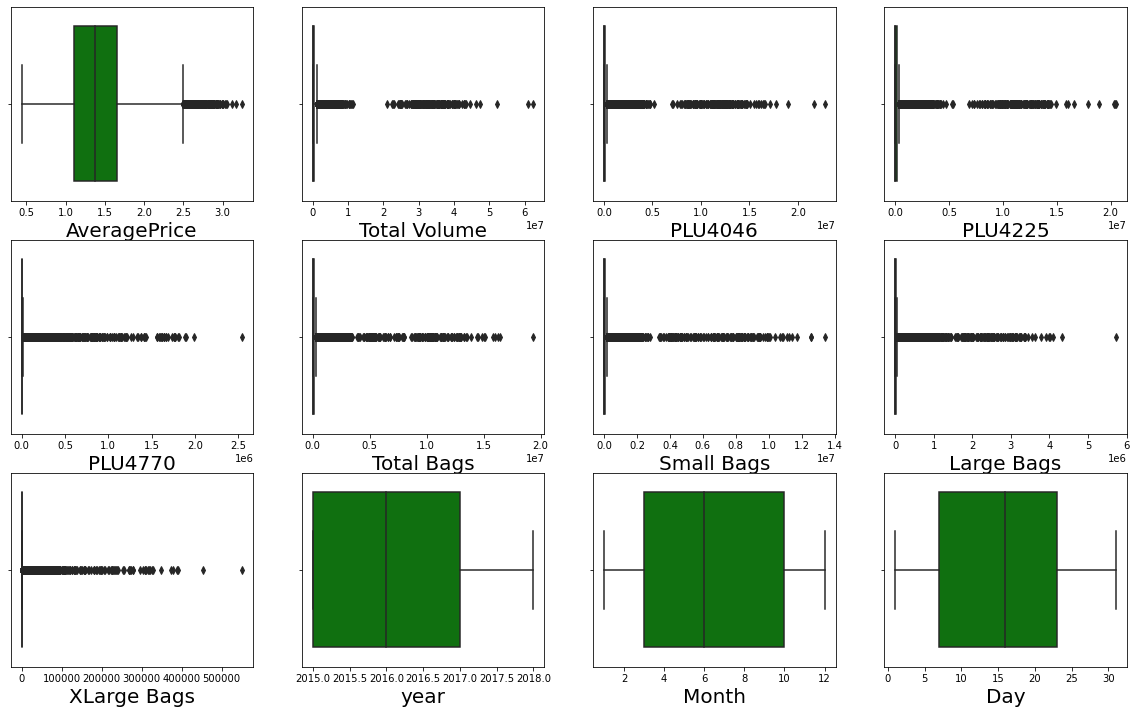

In [45]:
numerical_col=['AveragePrice', 'Total Volume', 'PLU4046', 'PLU4225', 'PLU4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The outliers present in all the columns except year, Month and Day. Let's remove the outliers using Zscore method. Even AveragePrice has outliers, as its our target variable we will not remove outliers from it.

# Removing outliers

# 1.Zscore method

In [46]:
df.columns

Index(['AveragePrice', 'Total Volume', 'PLU4046', 'PLU4225', 'PLU4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

In [47]:
# Features containing outliers
feature_cols = df[['Total Volume', 'PLU4046', 'PLU4225', 'PLU4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [48]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature_cols))

z

Total Volume   PLU4046   PLU4225   PLU4770  Total Bags  Small Bags  \
0          0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1          0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2          0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3          0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4          0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   
...             ...       ...       ...       ...         ...         ...   
18244      0.241373  0.230017  0.243857  0.212540    0.229301    0.226665   
18245      0.242296  0.230693  0.242277  0.212540    0.233594    0.232196   
18246      0.242331  0.230693  0.243090  0.205766    0.233463    0.231644   
18247      0.241625  0.230428  0.242651  0.205774    0.231866    0.229543   
18248      0.241253  0.229347  0.243170  0.210450    0.230807    0.228111   

       Large Bags  XLarge Bags  
0        0.222352      0.17558  
1        0.222335      0.17558  
2        0.222311      0.17558  
3        0.222186      0.17558  
4        0.221924      0.17558  
...           ...          ...  
18244    0.220964      0.17558  
18245    0.221403      0.17558  
18246    0.222561      0.17558  
18247    0.222529      0.17558  
18248    0.222628      0.17558  

[18249 rows x 8 columns]

In [49]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

AveragePrice  Total Volume  PLU4046    PLU4225  PLU4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85    48.16     8696.87   
1              1.35      54876.98   674.28   44638.81    58.33     9505.56   
2              0.93     118220.22   794.70  109149.67   130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41    72.58     5811.16   
4              1.28      51039.60   941.48   43838.39    75.78     6183.95   
...             ...           ...      ...        ...      ...         ...   
18244          1.63      17074.83  2046.96    1529.20     0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50     0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79   727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04   727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13   224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany      6   12  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      4    2  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      7    1  

[17782 rows x 14 columns]

This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [50]:
# Shape of original dataset
df.shape

(18249, 14)

Original dataset contains 18249 rows and 14 colums

In [51]:
# Shape of new dataframe
new_df.shape

(17782, 14)

After Removing outliers dataset contains 17782 rows and 14 columns

In [52]:
# Checking the the data loss
data_loss = (18249-17782)/18249*100
data_loss

2.55904433119623

We are loosing 2.5% data which is less than 10%

# 2. IQR (Inter Quantile Range) method

In [53]:
# 1st quantile
Q1=feature_cols.quantile(0.25)

# 3rd quantile
Q3=feature_cols.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [54]:
df1.shape

(11747, 14)

The dataset contains 11747 rows and 14 columns after outliers removal

In [55]:
# Let's check the dataloss
data_loss = (18249-11747)/18249*100
data_loss

35.62934955340019

Using IQR method the data loss is 35.62% which is not feasible, So i am considering Z score method

# Checking for skewness

In [56]:
# Checking the skewness
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
PLU4046         4.928850
PLU4225         4.472729
PLU4770         5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

All the columns have skewness except year, Month and Day. AveragePrice is our label so no need to remove skewness in this column.

# Removing skewness using yeo-johnson method

In [57]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', 'PLU4046', 'PLU4225', 'PLU4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [58]:
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features].head()

Total Volume   PLU4046   PLU4225   PLU4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [59]:
# Checking skewness after using yeo=johnson ethod
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
PLU4046        -0.038259
PLU4225        -0.043246
PLU4770         0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

After using yeo-johnson method the skewness is still present in XLarge Bags, Let's remove skewness using log transformation.

In [60]:
# Removing skewness using log transformation
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])

The skewness has been removed.

In [61]:
# Let's check the skewness again
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
PLU4046        -0.038259
PLU4225        -0.043246
PLU4770         0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

In [62]:
# Removing skewness using log transformation
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])

In [63]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
PLU4046        -0.038259
PLU4225        -0.043246
PLU4770         0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags    -2.926443
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

In [64]:
f1=["XLarge Bags"]
new_df[f1] = scaler.fit_transform(new_df[f1].values)

In [65]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
PLU4046        -0.038259
PLU4225        -0.043246
PLU4770         0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags    -0.777061
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

The skewness removed from all columns.

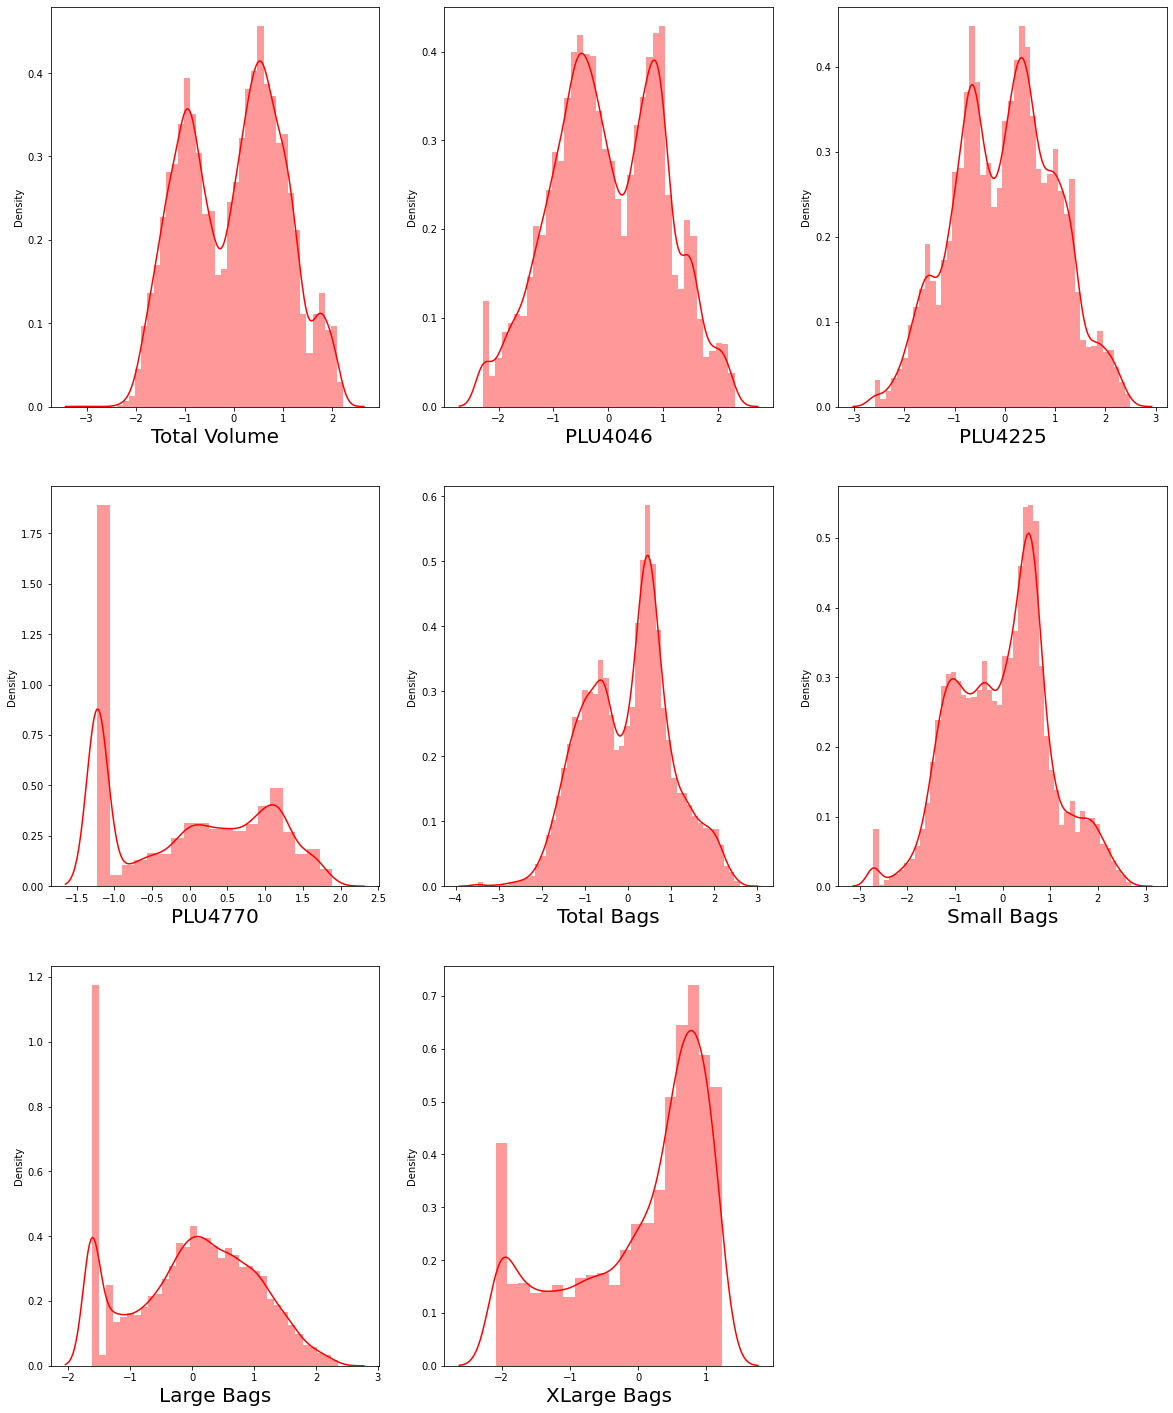

In [66]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data looks almost normal compare to previous data and the skewness is also removed.

# Encoding the categorical columns using Label Encoding

In [67]:
categorical_col = ["type","region"]

In [68]:

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [69]:
new_df[categorical_col]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]

The data after encoding the features using label encoder.

# Correlation between the target variable and independent variables using HEAT map

In [70]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

AveragePrice  Total Volume   PLU4046   PLU4225   PLU4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
PLU4046          -0.548618      0.889083  1.000000  0.764679  0.736523   
PLU4225          -0.448579      0.924160  0.764679  1.000000  0.796799   
PLU4770          -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
XLarge Bags      -0.014955      0.315883  0.216892  0.294745  0.284666   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Month             0.071568     -0.015294 -0.014000 -0.019092 -0.012151   
Day               0.058266     -0.010471 -0.009166 -0.008019 -0.000721   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.564616   -0.493621   -0.477879    -0.014955  0.608447   
Total Volume    0.939776    0.905098    0.681427     0.315883 -0.800828   
PLU4046         0.799354    0.778765    0.601899     0.216892 -0.725826   
PLU4225         0.818511    0.784901    0.614878     0.294745 -0.747722   
PLU4770         0.761641    0.754305    0.548457     0.284666 -0.780988   
Total Bags      1.000000    0.949901    0.729652     0.317186 -0.725686   
Small Bags      0.949901    1.000000    0.566307     0.313616 -0.720466   
Large Bags      0.729652    0.566307    1.000000     0.188139 -0.500026   
XLarge Bags     0.317186    0.313616    0.188139     1.000000 -0.192393   
type           -0.725686   -0.720466   -0.500026    -0.192393  1.000000   
year            0.210924    0.185955    0.190295     0.108843  0.007399   
region          0.065996    0.051985    0.086573    -0.079709  0.021970   
Month          -0.004350   -0.002533   -0.004320    -0.011297 -0.003290   
Day            -0.007650   -0.003569   -0.005833    -0.014335 -0.003108   

                  year    region     Month       Day  
AveragePrice  0.099910  0.010428  0.071568  0.058266  
Total Volume  0.076584  0.065709 -0.015294 -0.010471  
PLU4046      -0.002396  0.159390 -0.014000 -0.009166  
PLU4225      -0.004533  0.032273 -0.019092 -0.008019  
PLU4770      -0.051657  0.037805 -0.012151 -0.000721  
Total Bags    0.210924  0.065996 -0.004350 -0.007650  
Small Bags    0.185955  0.051985 -0.002533 -0.003569  
Large Bags    0.190295  0.086573 -0.004320 -0.005833  
XLarge Bags   0.108843 -0.079709 -0.011297 -0.014335  
type          0.007399  0.021970 -0.003290 -0.003108  
year          1.000000 -0.003610 -0.098248 -0.025666  
region       -0.003610  1.000000  0.001784  0.000890  
Month        -0.098248  0.001784  1.000000 -0.045512  
Day          -0.025666  0.000890 -0.045512  1.000000

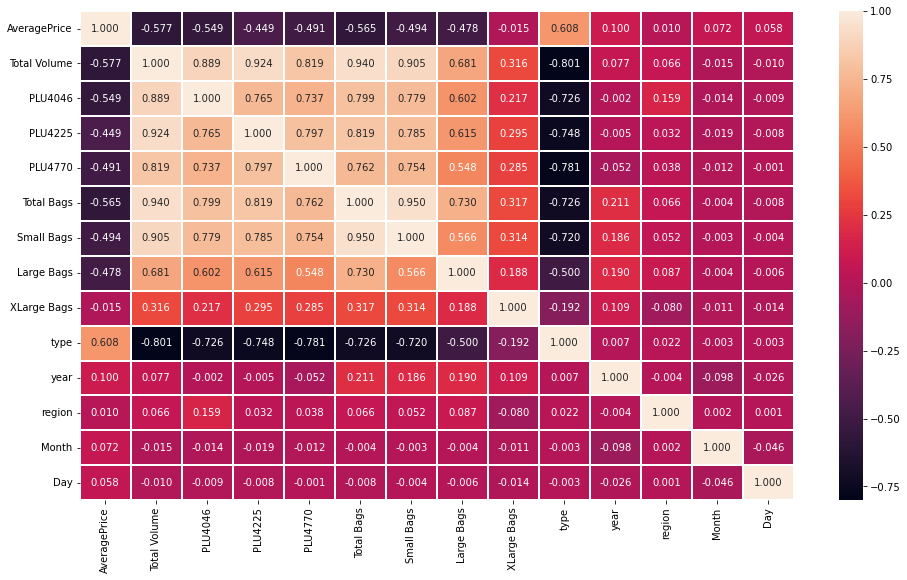

In [71]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

This heat map contains both positive and negative correlation.

Almost all the features are highly negatively correlated with the target variable and few columns year, Month and type have positive correlation with the target.

The features Day and region have no relation with the target so we can drop these columns.

Almost all the features are correlated with each other which leads to multicollinearity problem. We will solve this problem by VIF value.

Also most of the columns have no relation with each other and have zero correlation.

In [72]:
cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
year            0.099910
Month           0.071568
Day             0.058266
region          0.010428
XLarge Bags    -0.014955
PLU4225        -0.448579
Large Bags     -0.477879
PLU4770        -0.491320
Small Bags     -0.493621
PLU4046        -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

# Visualizing the correlation between label and features using bar plot

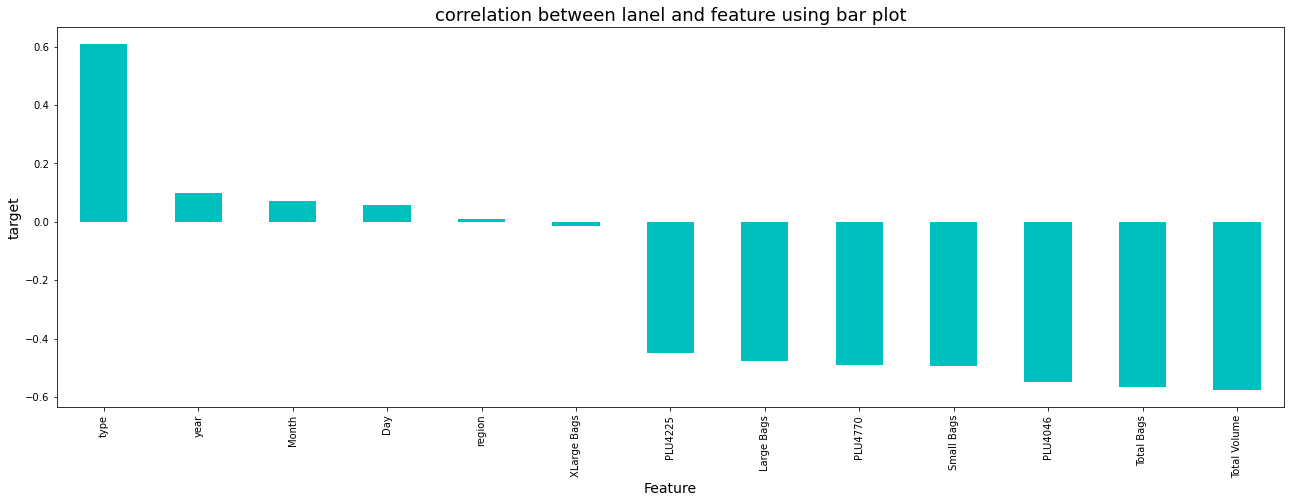

In [73]:
plt.figure(figsize=(22,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

The features region,Day and XLarge Bags have very less correlation with the target so we can drop these columns.

In [74]:
# Dropping irrelevant columns
new_df.drop("region",axis=1, inplace=True)
new_df.drop("Day",axis=1, inplace=True)
new_df.drop("XLarge Bags",axis=1, inplace=True)

In [75]:
new_df.head()

AveragePrice  Total Volume   PLU4046   PLU4225   PLU4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  type  year  Month  
0   -0.337064   -0.775214     0  2015     12  
1   -0.301038   -0.765237     0  2015     12  
2   -0.364044   -0.752534     0  2015     12  
3   -0.500341   -0.693012     0  2015      6  
4   -0.479918   -0.600755     0  2015     11

This is the dataframe after removing irrelevant columns.

# Separating the features and label variables into x and y

In [76]:
x = new_df.drop("AveragePrice", axis=1)
y = new_df["AveragePrice"]

In [77]:
x.shape

(17782, 10)

In [78]:
y.shape

(17782,)

In [79]:
x.head()

Total Volume   PLU4046   PLU4225   PLU4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  type  year  Month  
0   -0.775214     0  2015     12  
1   -0.765237     0  2015     12  
2   -0.752534     0  2015     12  
3   -0.693012     0  2015      6  
4   -0.600755     0  2015     11

# Standard Scalarization

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Total Volume   PLU4046   PLU4225   PLU4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
17777     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
17778     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
17779     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
17780     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
17781     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags      type      year     Month  
0       -0.775214 -1.026443 -1.214908  1.592359  
1       -0.765237 -1.026443 -1.214908  1.592359  
2       -0.752534 -1.026443 -1.214908  1.592359  
3       -0.693012 -1.026443 -1.214908 -0.108942  
4       -0.600755 -1.026443 -1.214908  1.308809  
...           ...       ...       ...       ...  
17777   -0.405895  0.974238  1.979143 -0.676043  
17778   -0.478556  0.974238  1.979143 -1.526694  
17779   -0.945246  0.974238  1.979143 -1.526694  
17780   -0.910471  0.974238  1.979143 -1.526694  
17781   -1.042930  0.974238  1.979143  0.174608  

[17782 rows x 10 columns]

I have scaled data now. Since we have multicollinearity problem, so let's use VIF factor to find it out.

# Checking VIF values to solve multicollinearity

In [81]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0   51.428950  Total Volume
1    6.751503       PLU4046
2   11.106894       PLU4225
3    3.883751       PLU4770
4   34.361354    Total Bags
5   16.614656    Small Bags
6    3.459948    Large Bags
7    3.315055          type
8    1.296304          year
9    1.017600         Month

The VIF value is more than 10 in the features Total Volume, 4225, Total Bags, Small Bags and Large Bags. First I will remove the column having high VIF value and will check the VIF again, if the value retains more than 10 then I will drop the specific column again.

In [82]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [83]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0   36.623819  Total Volume
1    6.029591       PLU4046
2    9.932687       PLU4225
3    3.880418       PLU4770
4    7.608856    Small Bags
5    2.099166    Large Bags
6    3.278966          type
7    1.270923          year
8    1.016677         Month

In [84]:
# DataFrame after preprocessing and data cleaning
x.head()

Total Volume   PLU4046   PLU4225   PLU4770  Small Bags  Large Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.337064   -0.775214   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.301038   -0.765237   
2      0.215503 -0.724508  0.656010  0.034215   -0.364044   -0.752534   
3      0.029840 -0.625017  0.475615 -0.110976   -0.500341   -0.693012   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.479918   -0.600755   

       type      year     Month  
0 -1.026443 -1.214908  1.592359  
1 -1.026443 -1.214908  1.592359  
2 -1.026443 -1.214908  1.592359  
3 -1.026443 -1.214908 -0.108942  
4 -1.026443 -1.214908  1.308809

# Modeling

# Finding best random state

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [86]:
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.7559511276937863  on Random_state  11


I am getting maximum R2 score 75% on the basis of Random state 12.

# Creating new train test split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Regression Algorithms

In [88]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Random Forest Regressor

In [89]:
# Checking R2 score for  Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.8199745511245844
MAE: 0.12061068416119965
MSE: 0.02940328392127461
RMSE: 0.17147385783633204
Cross_Validaton_Score 0.2532320852148145


The R2 score of Random forest regressor is 81%

# Support Vector Machine Regressor

In [90]:
# Checking R2 score for Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)

# prediction
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('MAE:',metrics.mean_absolute_error(y_test, predsvr))
print('MSE:',metrics.mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 
print("Cross_Validaton_Score",cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.7174269518421694
MAE: 0.15662177371964622
MSE: 0.04615222800657779
RMSE: 0.21483069614600656
Cross_Validaton_Score 0.18903252328234332


The R2 score using SVR model is 71%.

# Linear Regression

In [91]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',metrics.mean_absolute_error(y_test, predLR))
print('MSE:',metrics.mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print("Cross_Validaton_Score",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.5241136093582669
MAE: 0.2185655259903577
MSE: 0.07772580346678042
RMSE: 0.2787934781639994
Cross_Validaton_Score 0.18724994479086843


The R2 score for Linear Regressor is 49%.

# Stochastic Gradient Descent Regressor

In [92]:
# Checking R2 score for Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',metrics.mean_absolute_error(y_test, predSGD))
print('MSE:',metrics.mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predSGD)))

# Checking cv score for Stochastic Gradient Descent Regressor
print("Cross_Validaton_Score",cross_val_score(SGD,x,y,cv=5).mean())

R2_Score: 0.5214007558831959
MAE: 0.21926868330783197
MSE: 0.07816888971632244
RMSE: 0.27958699847511226
Cross_Validaton_Score 0.17272927401396562


The R2 score for SGDRegressor is 49%.

# KNeighbors Regressor

In [93]:
# Checking R2 score for KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

# Checking cv score for KNN
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.7559511276937863
MAE: 0.14027666354264293
MSE: 0.03986013270852859
RMSE: 0.19965002556606046
Cross_Validaton_Score 0.10218203477046535


The R2 score using KNN regressor is 75%.

# GradientBoosting Regressor

In [94]:
# Checking R2 score for  GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Checking cv score for GradientBoosting Regressor
print("Cross_Validaton_Score",cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.6738198637050399
MAE: 0.17536593093214226
MSE: 0.053274507670290176
RMSE: 0.23081271124071606
Cross_Validaton_Score 0.30923533624550475


Thr R2 score using GradientBoosting Regressor regressor is 66%.

From the difference between R2 score and Cross Validation Score we can conclude that KNeighbors Regressor as our best fitting model.

# Hyperparameter Tuning

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
#KNeighbors Regressor
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance']}

In [97]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [98]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [99]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}

In [100]:
avocado =KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
avocado.fit(x_train, y_train)
pred = avocado.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.17147385783633204
R2_Score: 76.6460136801953


After tuning the R2 score of the model is increasing and is giving 76%.

# Saving the model

In [101]:
# Saving the model using .pkl
import joblib
joblib.dump(avocado,"Avocado_price.pkl")

['Avocado_price.pkl']

# Predicting the saved model

In [102]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Avocado_price.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1.3558385 , 1.15743606, 1.31459224, ..., 0.62493811, 1.14863383,
       0.92005959])

These are the predicted average price of the avocado.

In [103]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0         1         2         3         4         5     \
Predicted  1.355838  1.157436  1.314592  1.820613  1.532834  1.054315   
Original   1.350000  1.250000  1.250000  1.680000  1.160000  1.010000   

               6         7         8         9     ...      5325      5326  \
Predicted  1.563553  1.621923  2.001088  1.399838  ...  1.936794  1.484149   
Original   1.780000  1.710000  1.950000  1.380000  ...  2.060000  1.760000   

               5327      5328     5329      5330      5331      5332  \
Predicted  1.834761  1.153123  1.34631  1.039138  0.996897  0.624938   
Original   2.020000  0.920000  1.35000  0.990000  0.790000  0.710000   

               5333     5334  
Predicted  1.148634  0.92006  
Original   1.090000  0.88000  

[2 rows x 5335 columns]

We can observe both original and predicted values are almost same.

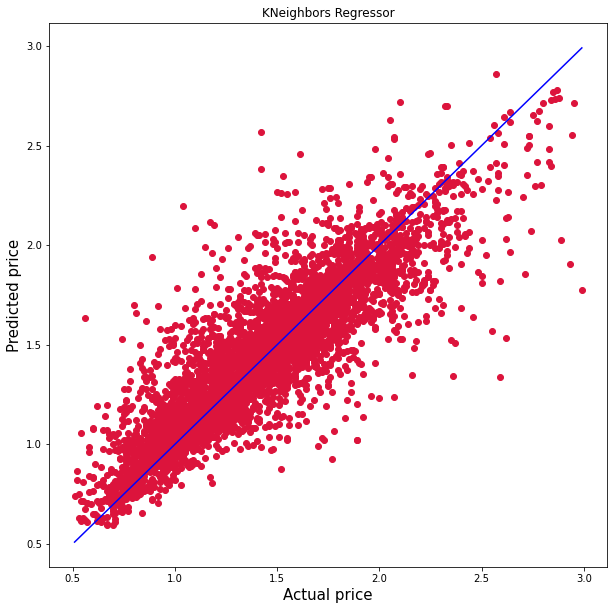

In [104]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("KNeighbors Regressor")
plt.xlabel('Actual price', fontsize=15)
plt.ylabel('Predicted price', fontsize=15)
plt.show()

# 2.Classification Problem- Region

In [105]:
# Reading the csv file from dataset
df = pd.read_csv(r"C:\Users\Surjit Singh Kadian\Desktop\avacado.csv")
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1           1  20-12-2015          1.35      54876.98   674.28   44638.81   
2           2  13-12-2015          0.93     118220.22   794.70  109149.67   
3           3  06-12-2015          1.08      78992.15  1132.00   71976.41   
4           4  29-11-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

Dropping irrelevant column unnamed

In [106]:
df.drop("Unnamed: 0",axis=1, inplace=True)

In [107]:
df = df.rename(columns={'4046':'PLU4046','4225':'PLU4225','4770':'PLU4770'})

In [108]:
df.head()

Date  AveragePrice  Total Volume  PLU4046    PLU4225  PLU4770  \
0  27-12-2015          1.33      64236.62  1036.74   54454.85    48.16   
1  20-12-2015          1.35      54876.98   674.28   44638.81    58.33   
2  13-12-2015          0.93     118220.22   794.70  109149.67   130.50   
3  06-12-2015          1.08      78992.15  1132.00   71976.41    72.58   
4  29-11-2015          1.28      51039.60   941.48   43838.39    75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [109]:
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])

In [110]:
# Checking the type of data again
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
PLU4046                float64
PLU4225                float64
PLU4770                float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [111]:
df["Month"] = df["Date"].dt.month

In [112]:
df["Day"] = df["Date"].dt.day

In [113]:
df.drop("Date",axis=1,inplace=True)

In [114]:
df.head()

AveragePrice  Total Volume  PLU4046    PLU4225  PLU4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85    48.16     8696.87   
1          1.35      54876.98   674.28   44638.81    58.33     9505.56   
2          0.93     118220.22   794.70  109149.67   130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41    72.58     5811.16   
4          1.28      51039.60   941.48   43838.39    75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany      6   12  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [115]:
# Checking the uniqueness of target variable
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [116]:
# List of values in the target variable
df["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [117]:
# Checking wheather the dataset contains any space
df.loc[df['region']==" "]

Empty DataFrame
Columns: [AveragePrice, Total Volume, PLU4046, PLU4225, PLU4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, Month, Day]
Index: []

In [118]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


In [119]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', 'PLU4046', 'PLU4225', 'PLU4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

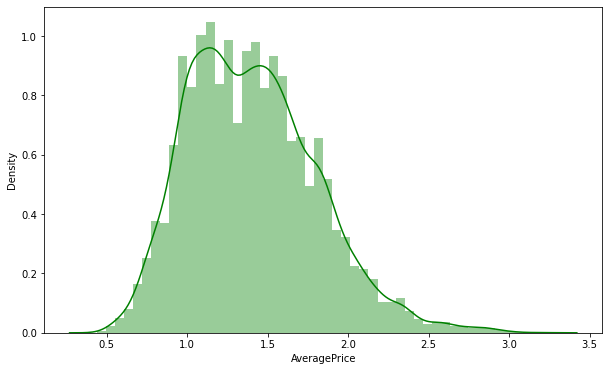

In [120]:
# Distribution plot for target variable "region"
print(df["region"].value_counts())
plt.figure(figsize=(10,6))
sns.distplot(df["AveragePrice"], color="g")
plt.show()

our target variable is normally distributed

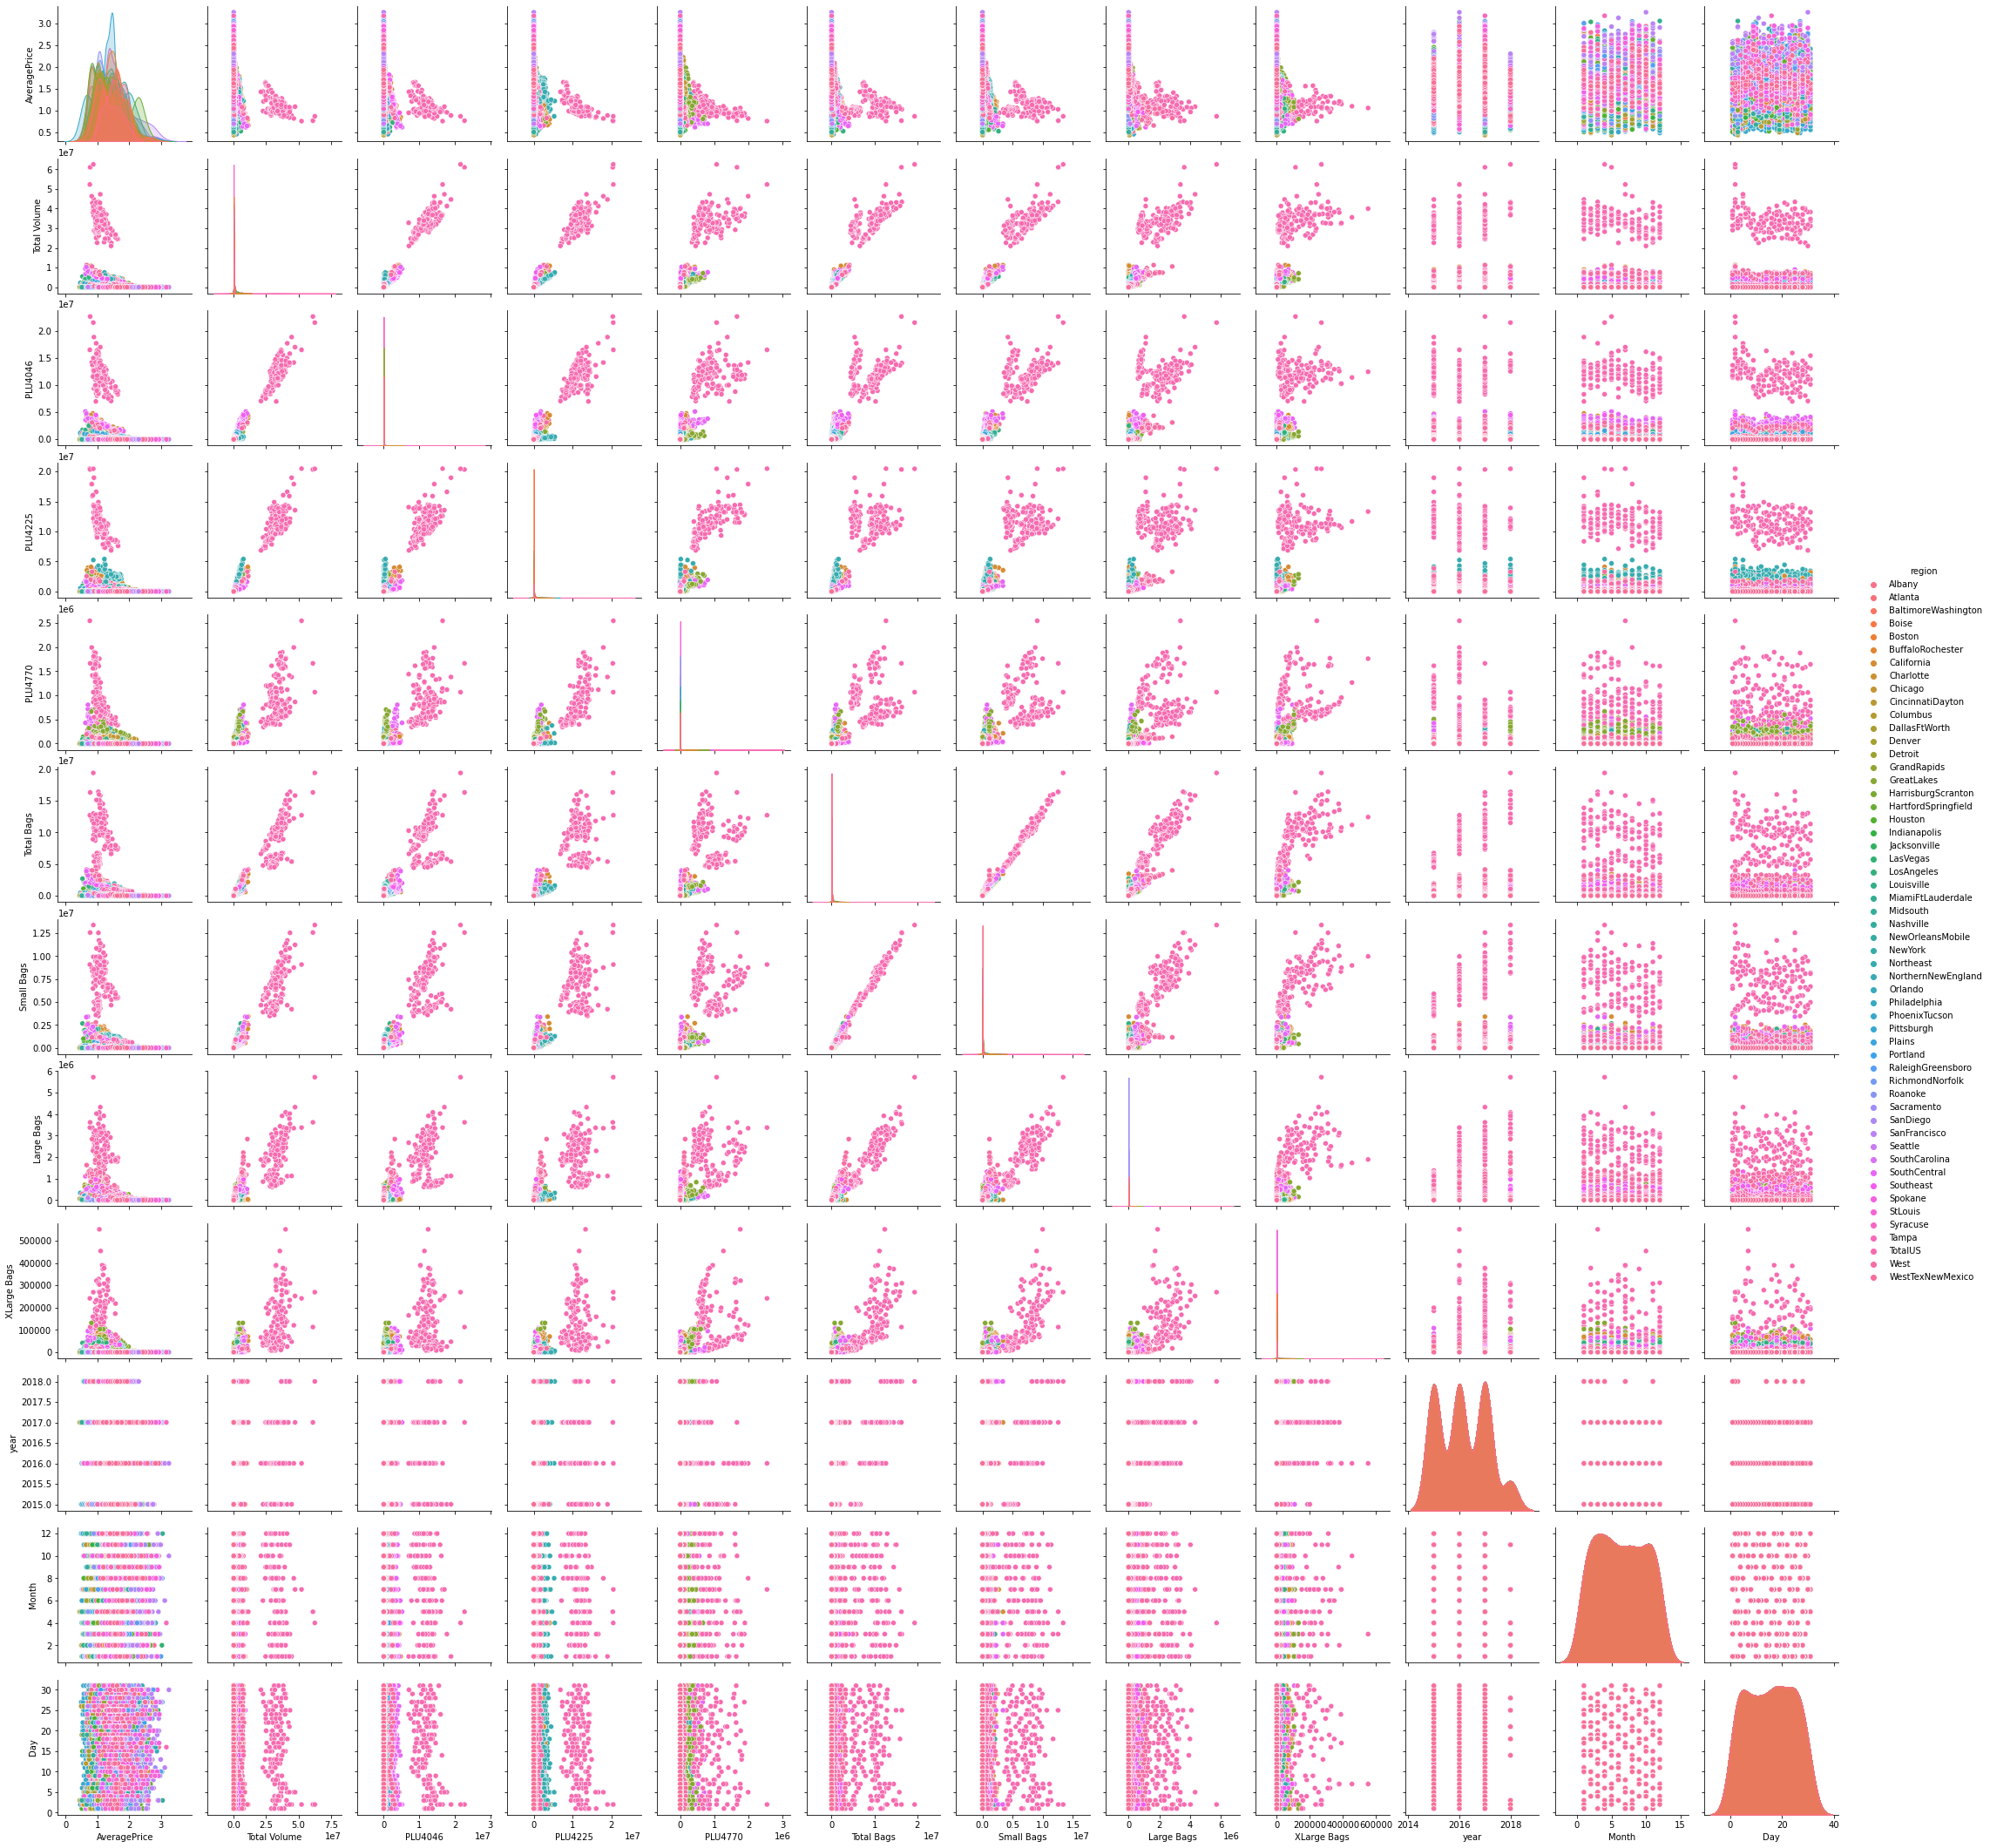

In [121]:
sns.pairplot(df,hue="region",palette="husl")

# Outliers

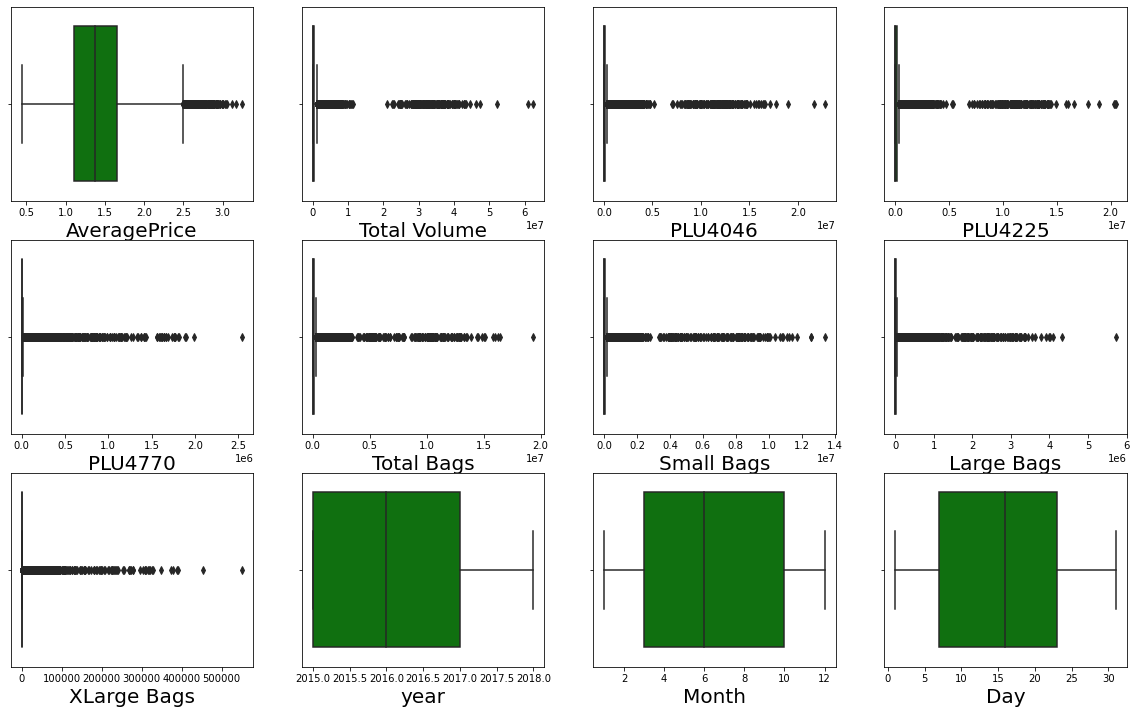

In [122]:
numerical_col=['AveragePrice', 'Total Volume', 'PLU4046', 'PLU4225', 'PLU4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [123]:
# Features containing outliers
features = df[['Total Volume', 'PLU4046', 'PLU4225', 'PLU4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

# Removing Outliers using z-score method

In [124]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

Total Volume   PLU4046   PLU4225   PLU4770  Total Bags  Small Bags  \
0          0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1          0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2          0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3          0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4          0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   
...             ...       ...       ...       ...         ...         ...   
18244      0.241373  0.230017  0.243857  0.212540    0.229301    0.226665   
18245      0.242296  0.230693  0.242277  0.212540    0.233594    0.232196   
18246      0.242331  0.230693  0.243090  0.205766    0.233463    0.231644   
18247      0.241625  0.230428  0.242651  0.205774    0.231866    0.229543   
18248      0.241253  0.229347  0.243170  0.210450    0.230807    0.228111   

       Large Bags  XLarge Bags  
0        0.222352      0.17558  
1        0.222335      0.17558  
2        0.222311      0.17558  
3        0.222186      0.17558  
4        0.221924      0.17558  
...           ...          ...  
18244    0.220964      0.17558  
18245    0.221403      0.17558  
18246    0.222561      0.17558  
18247    0.222529      0.17558  
18248    0.222628      0.17558  

[18249 rows x 8 columns]

In [125]:
# Creating new dataframe
new_df1 = df[(z<3).all(axis=1)] 
new_df1

AveragePrice  Total Volume  PLU4046    PLU4225  PLU4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85    48.16     8696.87   
1              1.35      54876.98   674.28   44638.81    58.33     9505.56   
2              0.93     118220.22   794.70  109149.67   130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41    72.58     5811.16   
4              1.28      51039.60   941.48   43838.39    75.78     6183.95   
...             ...           ...      ...        ...      ...         ...   
18244          1.63      17074.83  2046.96    1529.20     0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50     0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79   727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04   727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13   224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany      6   12  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      4    2  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      7    1  

[17782 rows x 14 columns]

# Checking for skewness

In [126]:
# Checking the skewness
new_df1.skew()

AveragePrice    0.560969
Total Volume    3.782060
PLU4046         4.928850
PLU4225         4.472729
PLU4770         5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

In [127]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', 'PLU4046', 'PLU4225', 'PLU4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [128]:
new_df1[features] = scaler.fit_transform(new_df1[features].values)
new_df1[features].head()

Total Volume   PLU4046   PLU4225   PLU4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [129]:
# Checking skewness after using yeo=johnson ethod
new_df1.skew()

AveragePrice    0.560969
Total Volume   -0.006809
PLU4046        -0.038259
PLU4225        -0.043246
PLU4770         0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

In [130]:
# Removing skewness using log transformation
new_df1["XLarge Bags"] = np.log1p(new_df1["XLarge Bags"])

In [131]:
# Let's check the skewness again
new_df1.skew()

AveragePrice    0.560969
Total Volume   -0.006809
PLU4046        -0.038259
PLU4225        -0.043246
PLU4770         0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

As Xlarge bags still contains skewness we will drop this irrevelant column.

In [132]:
new_df1.drop("XLarge Bags",axis=1, inplace=True)

In [133]:
new_df1.head()

AveragePrice  Total Volume   PLU4046   PLU4225   PLU4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags          type  year  region  Month  Day  
0   -0.337064   -0.775214  conventional  2015  Albany     12   27  
1   -0.301038   -0.765237  conventional  2015  Albany     12   20  
2   -0.364044   -0.752534  conventional  2015  Albany     12   13  
3   -0.500341   -0.693012  conventional  2015  Albany      6   12  
4   -0.479918   -0.600755  conventional  2015  Albany     11   29

# Encoding the categorical columns using Label Encoding

In [134]:
categorical_col = ["type","region"]

In [135]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df1[categorical_col]= new_df1[categorical_col].apply(LE.fit_transform)

In [136]:
new_df1[categorical_col]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]

# Checking the correlation between features and the target

In [137]:
# Checking the correlation between features and the target
cor = new_df1.corr()
cor

AveragePrice  Total Volume   PLU4046   PLU4225   PLU4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
PLU4046          -0.548618      0.889083  1.000000  0.764679  0.736523   
PLU4225          -0.448579      0.924160  0.764679  1.000000  0.796799   
PLU4770          -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Month             0.071568     -0.015294 -0.014000 -0.019092 -0.012151   
Day               0.058266     -0.010471 -0.009166 -0.008019 -0.000721   

              Total Bags  Small Bags  Large Bags      type      year  \
AveragePrice   -0.564616   -0.493621   -0.477879  0.608447  0.099910   
Total Volume    0.939776    0.905098    0.681427 -0.800828  0.076584   
PLU4046         0.799354    0.778765    0.601899 -0.725826 -0.002396   
PLU4225         0.818511    0.784901    0.614878 -0.747722 -0.004533   
PLU4770         0.761641    0.754305    0.548457 -0.780988 -0.051657   
Total Bags      1.000000    0.949901    0.729652 -0.725686  0.210924   
Small Bags      0.949901    1.000000    0.566307 -0.720466  0.185955   
Large Bags      0.729652    0.566307    1.000000 -0.500026  0.190295   
type           -0.725686   -0.720466   -0.500026  1.000000  0.007399   
year            0.210924    0.185955    0.190295  0.007399  1.000000   
region          0.065996    0.051985    0.086573  0.021970 -0.003610   
Month          -0.004350   -0.002533   -0.004320 -0.003290 -0.098248   
Day            -0.007650   -0.003569   -0.005833 -0.003108 -0.025666   

                region     Month       Day  
AveragePrice  0.010428  0.071568  0.058266  
Total Volume  0.065709 -0.015294 -0.010471  
PLU4046       0.159390 -0.014000 -0.009166  
PLU4225       0.032273 -0.019092 -0.008019  
PLU4770       0.037805 -0.012151 -0.000721  
Total Bags    0.065996 -0.004350 -0.007650  
Small Bags    0.051985 -0.002533 -0.003569  
Large Bags    0.086573 -0.004320 -0.005833  
type          0.021970 -0.003290 -0.003108  
year         -0.003610 -0.098248 -0.025666  
region        1.000000  0.001784  0.000890  
Month         0.001784  1.000000 -0.045512  
Day           0.000890 -0.045512  1.000000

In [138]:
cor['region'].sort_values(ascending=False)

region          1.000000
PLU4046         0.159390
Large Bags      0.086573
Total Bags      0.065996
Total Volume    0.065709
Small Bags      0.051985
PLU4770         0.037805
PLU4225         0.032273
type            0.021970
AveragePrice    0.010428
Month           0.001784
Day             0.000890
year           -0.003610
Name: region, dtype: float64

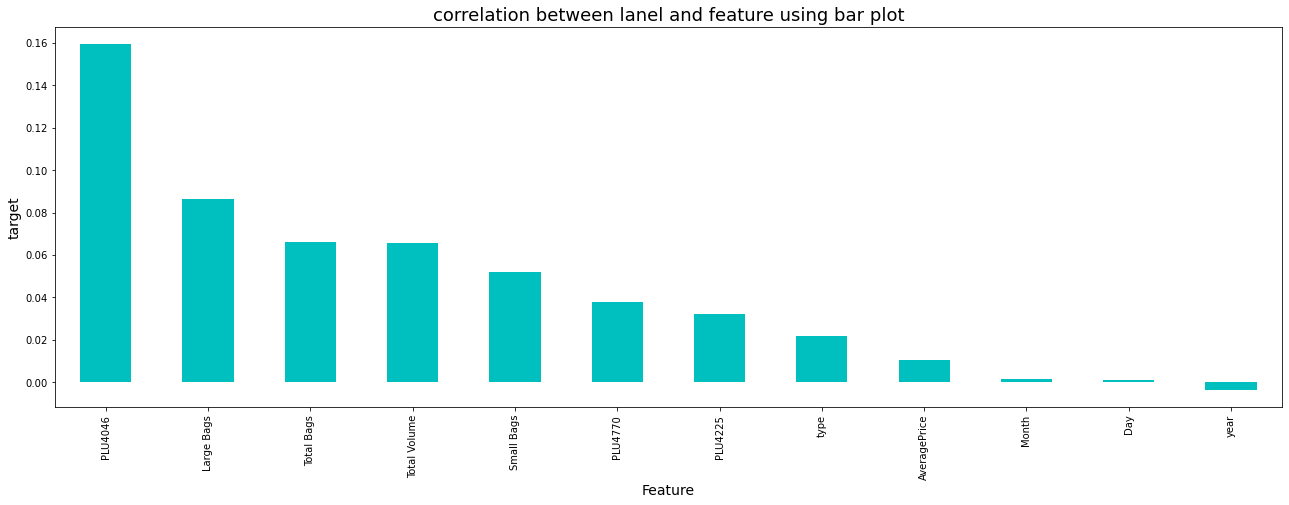

In [139]:
plt.figure(figsize=(22,7))
new_df1.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

Month, day and year column have very less corelation with target variable. so lets drop these columns.

In [140]:
# Dropping irrelevant columns
new_df1.drop("Month",axis=1, inplace=True)
new_df1.drop("Day",axis=1, inplace=True)
new_df1.drop("year",axis=1, inplace=True)

In [141]:
new_df1.head()

AveragePrice  Total Volume   PLU4046   PLU4225   PLU4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  type  region  
0   -0.337064   -0.775214     0       0  
1   -0.301038   -0.765237     0       0  
2   -0.364044   -0.752534     0       0  
3   -0.500341   -0.693012     0       0  
4   -0.479918   -0.600755     0       0

# Separating the features and label variables into x and y

In [142]:
x = new_df1.drop("region", axis=1)
y = new_df1["region"]

In [143]:
x.shape

(17782, 9)

In [144]:
y.shape

(17782,)

In [145]:
y.value_counts()

0     338
24    338
1     338
28    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
40    338
41    338
42    338
43    338
44    338
47    338
48    338
49    338
50    338
26    338
27    338
11    338
5     338
7     338
8     338
9     338
10    338
23    338
12    338
13    338
14    338
3     338
16    338
17    338
18    338
19    338
20    338
2     338
21    338
4     338
53    335
25    333
22    331
29    325
46    307
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

The data is not balanced. Let's use oversampling method to balance the data.

# Oversampling the data

In [146]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [147]:
y.value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
52    338
53    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
51    338
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

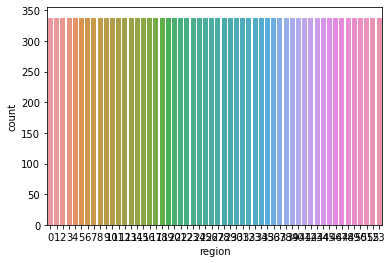

In [148]:
sns.countplot(y)

# Feature Scaling using Standard Scalarization

In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

AveragePrice  Total Volume   PLU4046   PLU4225   PLU4770  Total Bags  \
0         -0.214454     -0.090628 -0.670565  0.331757 -0.225580   -0.550915   
1         -0.164456     -0.162358 -0.790313  0.250312 -0.178255   -0.512137   
2         -1.214413      0.188239 -0.744906  0.627751  0.020624   -0.579336   
3         -0.839428      0.003721 -0.645747  0.448410 -0.124237   -0.723783   
4         -0.339449     -0.195340 -0.697640  0.242966 -0.113574   -0.697439   
...             ...           ...       ...       ...       ...         ...   
18247     -0.613909      1.913448  1.782363  1.764112  1.624625    2.381366   
18248      0.166973      0.576827  0.633300  0.316470  0.320419    0.843160   
18249     -1.689393      1.122783  1.479197  0.717370  1.250600    0.663236   
18250      1.000733     -0.857852 -0.625819 -0.756111 -0.472397   -0.601462   
18251      0.618939     -0.867719 -0.334378 -0.535427 -1.235721   -1.022498   

       Small Bags  Large Bags      type  
0       -0.361359   -0.795833 -1.038660  
1       -0.325721   -0.785969 -1.038660  
2       -0.388048   -0.773408 -1.038660  
3       -0.522875   -0.714557 -1.038660  
4       -0.502672   -0.623337 -1.038660  
...           ...         ...       ...  
18247    2.308083    2.279467 -1.038660  
18248    0.033717    1.486159  0.962779  
18249    0.625892    0.919209 -1.038660  
18250   -0.408242   -0.771678  0.962779  
18251   -0.792069   -0.796763  0.962779  

[18252 rows x 9 columns]

# Checking VIF values

In [150]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    1.938555  AveragePrice
1   54.323342  Total Volume
2    6.855352       PLU4046
3   12.193756       PLU4225
4    3.766827       PLU4770
5   35.607402    Total Bags
6   17.788603    Small Bags
7    3.554705    Large Bags
8    3.438184          type

In [151]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [154]:
# Againing checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    1.780660  AveragePrice
1    3.554615       PLU4046
2    4.246782       PLU4225
3    3.747578       PLU4770
4    3.552141    Small Bags
5    1.891829    Large Bags
6    3.331624          type

In [157]:
# DataFrame after preprocessing and data cleaning
x.head()

AveragePrice   PLU4046   PLU4225   PLU4770  Small Bags  Large Bags     type
0     -0.214454 -0.670565  0.331757 -0.225580   -0.361359   -0.795833 -1.03866
1     -0.164456 -0.790313  0.250312 -0.178255   -0.325721   -0.785969 -1.03866
2     -1.214413 -0.744906  0.627751  0.020624   -0.388048   -0.773408 -1.03866
3     -0.839428 -0.645747  0.448410 -0.124237   -0.522875   -0.714557 -1.03866
4     -0.339449 -0.697640  0.242966 -0.113574   -0.502672   -0.623337 -1.03866

# Finding best random state

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7962016070124178  on Random_state  78


# Creating train_test split

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=87)

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [162]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7960189919649379
[[ 84   0   0 ...   0   0   0]
 [  0  77   0 ...   0   0   1]
 [  0   0  98 ...   0   0   1]
 ...
 [  0   0   0 ... 102   0   0]
 [  0   0   0 ...   0  99   0]
 [  0   3   0 ...   0   0  57]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        98
           1       0.76      0.75      0.76       102
           2       0.94      0.90      0.92       109
           3       0.86      0.78      0.82       113
           4       0.86      0.80      0.83       107
           5       0.74      0.76      0.75        97
           6       0.98      0.96      0.97       112
           7       0.84      0.81      0.82       109
           8       0.89      0.95      0.92       109
           9       0.75      0.82      0.78       113
          10       0.73      0.61      0.67       111
          11       0.86      0.86      0.86       111
          12       0.84      0.84      0.84        96
          13       0.75      0.8

We are getting 79.6% accuracy using Decision Tree Classifier

# Random Forest Classifier

In [163]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8904309715120526
[[ 90   0   0 ...   0   0   0]
 [  0  86   0 ...   0   0   0]
 [  0   0 106 ...   0   0   0]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   1 102   0]
 [  0   0   1 ...   0   0  68]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        98
           1       0.89      0.84      0.86       102
           2       0.98      0.97      0.98       109
           3       0.90      0.84      0.87       113
           4       0.91      0.92      0.91       107
           5       0.83      0.82      0.83        97
           6       0.99      1.00      1.00       112
           7       0.94      0.88      0.91       109
           8       0.94      0.98      0.96       109
           9       0.85      0.84      0.84       113
          10       0.89      0.83      0.86       111
          11       0.93      0.91      0.92       111
          12       0.97      0.96      0.96        96
          13       0.80      0.9

We are getting 89% accuracy using Random Forest Classifier

# Logistic Regression Classifier

In [164]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.4589116143170197
[[ 56   0   0 ...   0   0   0]
 [  0  35   0 ...   0   0   0]
 [  0   0  59 ...   0   0  10]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   0  86   0]
 [  0   7   0 ...   0   0   8]]
              precision    recall  f1-score   support

           0       0.53      0.57      0.55        98
           1       0.21      0.34      0.26       102
           2       0.68      0.54      0.60       109
           3       0.44      0.31      0.36       113
           4       0.48      0.50      0.49       107
           5       0.53      0.40      0.46        97
           6       0.74      0.82      0.78       112
           7       0.49      0.48      0.48       109
           8       0.66      0.75      0.70       109
           9       0.45      0.62      0.52       113
          10       0.68      0.27      0.39       111
          11       0.41      0.39      0.40       111
          12       0.31      0.48      0.37        96
          13       0.09      0.0

We are getting 45% accuracy using Logistic Regression Classifier

# Support Vector Machine Classifier

In [165]:
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7724616508400293
[[ 90   0   0 ...   0   0   0]
 [  0  54   0 ...   0   0   0]
 [  0   0  96 ...   0   0   0]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   1 100   0]
 [  0   1   1 ...   0   0  58]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        98
           1       0.47      0.53      0.50       102
           2       0.96      0.88      0.92       109
           3       0.89      0.68      0.77       113
           4       0.82      0.77      0.79       107
           5       0.69      0.70      0.70        97
           6       0.98      1.00      0.99       112
           7       0.86      0.76      0.81       109
           8       0.96      0.96      0.96       109
           9       0.71      0.79      0.75       113
          10       0.73      0.65      0.69       111
          11       0.85      0.84      0.84       111
          12       0.86      0.97      0.91        96
          13       0.52      0.6

We are getting 77% accuracy using Support Vector Macine Classifier

# KNeighbors Classifier

In [166]:
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.847881665449233
[[ 88   0   0 ...   0   0   0]
 [  0  78   0 ...   0   0   0]
 [  0   0 107 ...   0   0   0]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   1 102   0]
 [  0   0   0 ...   0   0  62]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        98
           1       0.76      0.76      0.76       102
           2       0.96      0.98      0.97       109
           3       0.88      0.78      0.83       113
           4       0.86      0.89      0.87       107
           5       0.78      0.82      0.80        97
           6       0.99      0.99      0.99       112
           7       0.90      0.90      0.90       109
           8       0.98      0.97      0.98       109
           9       0.75      0.81      0.77       113
          10       0.77      0.72      0.74       111
          11       0.86      0.94      0.90       111
          12       0.89      0.94      0.91        96
          13       0.72      0.77

We are getting 84% accuracy using KNeighbors Classifier

# Checking the Cross Validation Score

In [168]:
from sklearn.model_selection import cross_val_score

In [169]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.5789469126491897


In [170]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.6990947873166669


In [171]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.3597972707796325


In [172]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.6409081392600263


In [173]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.6399760470953726


From the accuracy score and cross validation score i am choosing Random Forest Classifier as best model.

# Hyperparameter Tuning

In [174]:
from sklearn.model_selection import GridSearchCV

In [175]:
# Random forest classifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}

In [176]:
GCV=GridSearchCV(rfc,parameters,cv=5)

In [178]:
GCV.fit(x_train,y_train)
print(GCV.best_params_)

{'max_features': 'sqrt', 'n_estimators': 150}


In [179]:
region = RandomForestClassifier(max_features='auto',n_estimators=150 )
region.fit(x_train, y_train)
pred = region.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.59094229364499


The accuracy of the best model increased after tuning and giving 89.59% accuracy.

# Saving the model

In [180]:
# Saving the model using .pkl
import joblib
joblib.dump(region,"Avacado_region.pkl")

['Avacado_region.pkl']

# Predicting the saved model

In [181]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Avacado_region.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([49,  2,  5, ..., 48, 19, 22])

# The predicted region rate values

In [182]:
finaldf=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
finaldf

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted    49     2     5     7    22    18    38    48    45    12  ...   
Original     49     2     5     7    22    11    38    48    45    12  ...   

           5466  5467  5468  5469  5470  5471  5472  5473  5474  5475  
Predicted    29    19    52    31    46    26    39    48    19    22  
Original     29    19    52    48    46    26    39    48    19    22  

[2 rows x 5476 columns]

we can see thar predicted and original values are almost same

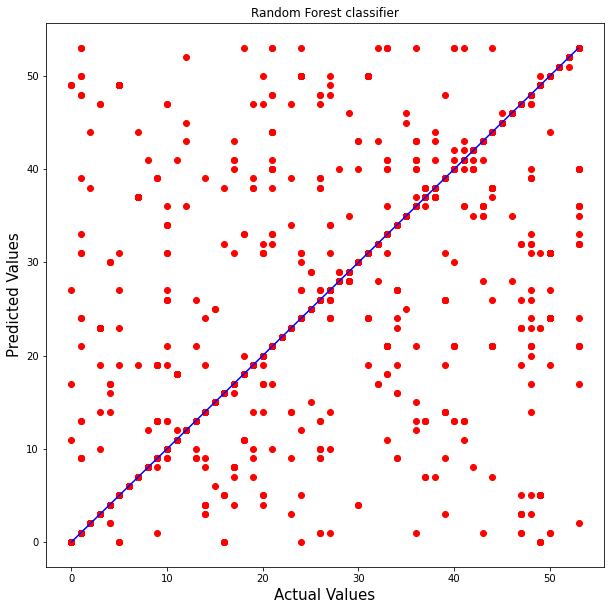

In [183]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='r')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest classifier")
plt.show()